In [1]:
# Import Necessary Libraires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 300

In [2]:
# Import Dataset

oil = pd.read_csv('Oil.csv')
df = oil.copy()
df

,Date,Close,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63
...,...,...,...,...,...,...
2543,11-05-2012,85.65,185846.0,84.65,85.90,84.34
2544,11-02-2012,84.86,273619.0,86.91,87.24,84.66
2545,11-01-2012,87.09,185097.0,86.10,87.42,85.92
2546,10/31/2012,86.24,192354.0,85.73,87.19,85.61


In [3]:
df.describe()

,Close,Volume,Open,High,Low
count,2548.000000,2.517000e+03,2548.000000,2548.000000,2548.000000
mean,66.043740,3.954717e+05,66.042500,66.959839,65.065043
std,22.732093,2.345385e+05,22.710749,22.820487,22.565127
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000
25%,48.620000,2.244770e+05,48.665000,49.317500,47.800000
50%,59.720000,3.638160e+05,59.770000,60.545000,58.850000
75%,87.467500,5.581500e+05,87.450000,88.695000,86.342500
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000


In [4]:
df.isna().sum()

Date       0
Close      0
Volume    31
Open       0
High       0
Low        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2548 non-null   object 
 1   Close   2548 non-null   float64
 2   Volume  2517 non-null   float64
 3   Open    2548 non-null   float64
 4   High    2548 non-null   float64
 5   Low     2548 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.6+ KB


In [6]:
df['Volume'].fillna(df['Volume'].median(), inplace=True)
df.isna().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [7]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataset by date in ascending order
df.sort_values('Date', inplace=True)

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

In [8]:
df

,Date,Close,Volume,Open,High,Low,Year
2547,2012-10-30,85.68,363816.0,85.68,85.68,85.68,2012
2546,2012-10-31,86.24,192354.0,85.73,87.19,85.61,2012
2545,2012-11-01,87.09,185097.0,86.10,87.42,85.92,2012
2544,2012-11-02,84.86,273619.0,86.91,87.24,84.66,2012
2543,2012-11-05,85.65,185846.0,84.65,85.90,84.34,2012
...,...,...,...,...,...,...,...
4,2022-10-24,84.58,238458.0,85.24,85.92,82.63,2022
3,2022-10-25,85.32,226337.0,84.88,86.03,83.06,2022
2,2022-10-26,87.91,271474.0,85.07,88.41,84.14,2022
1,2022-10-27,88.26,273717.0,88.26,89.79,87.33,2022


In [9]:
df1 = df.copy()
# Set Date column as index column
df1.set_index('Date', inplace=True)
df1

,Close,Volume,Open,High,Low,Year
Date,,,,,,
2012-10-30,85.68,363816.0,85.68,85.68,85.68,2012
2012-10-31,86.24,192354.0,85.73,87.19,85.61,2012
2012-11-01,87.09,185097.0,86.10,87.42,85.92,2012
2012-11-02,84.86,273619.0,86.91,87.24,84.66,2012
2012-11-05,85.65,185846.0,84.65,85.90,84.34,2012
...,...,...,...,...,...,...
2022-10-24,84.58,238458.0,85.24,85.92,82.63,2022
2022-10-25,85.32,226337.0,84.88,86.03,83.06,2022
2022-10-26,87.91,271474.0,85.07,88.41,84.14,2022


# EDA

### Summary Statistics

In [10]:
df1.describe()

,Close,Volume,Open,High,Low,Year
count,2548.000000,2.548000e+03,2548.000000,2548.000000,2548.000000,2548.000000
mean,66.043740,3.950866e+05,66.042500,66.959839,65.065043,2017.289246
std,22.732093,2.331327e+05,22.710749,22.820487,22.565127,2.905515
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000,2012.000000
25%,48.620000,2.255235e+05,48.665000,49.317500,47.800000,2015.000000
50%,59.720000,3.638160e+05,59.770000,60.545000,58.850000,2017.000000
75%,87.467500,5.558335e+05,87.450000,88.695000,86.342500,2020.000000
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000,2022.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2012-10-30 to 2022-10-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2548 non-null   float64
 1   Volume  2548 non-null   float64
 2   Open    2548 non-null   float64
 3   High    2548 non-null   float64
 4   Low     2548 non-null   float64
 5   Year    2548 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.3 KB


### Time Series Plot of Oil Price
- This plot helps visualize how oil prices have changed over time.

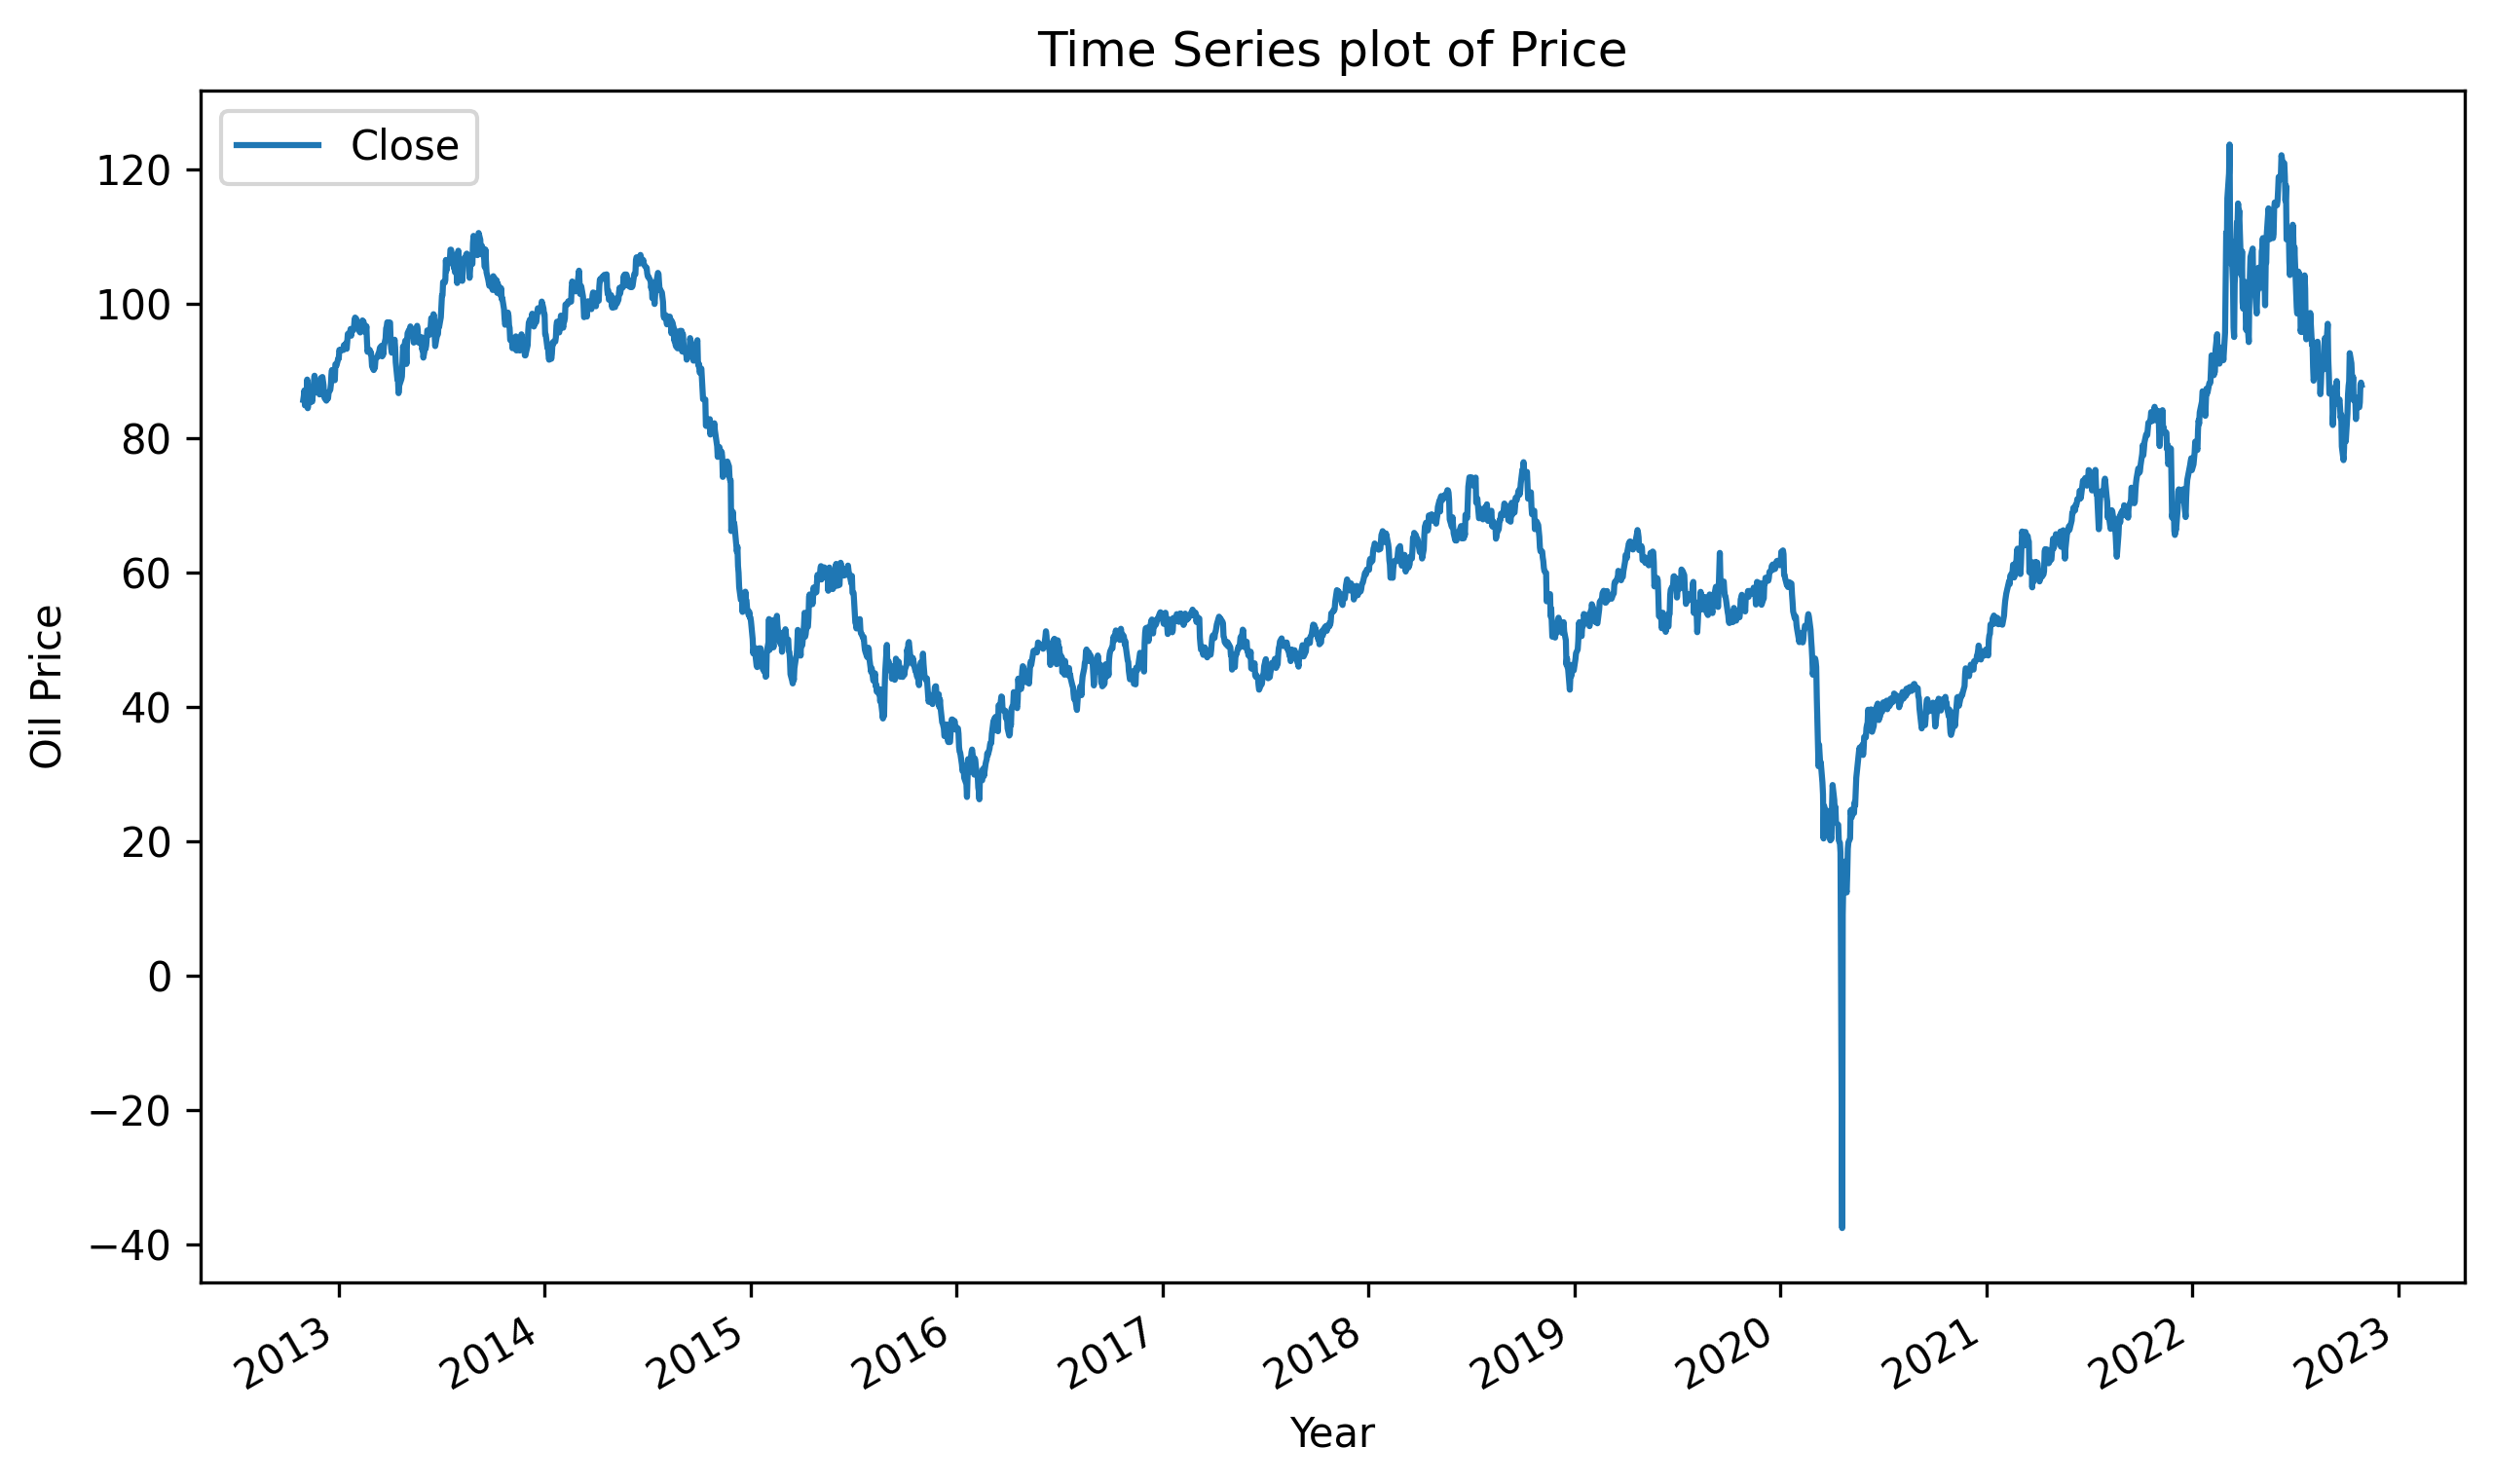

In [12]:
df1.Close.plot()
plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.title('Time Series plot of Price')
plt.legend()

In [13]:
df1.index = pd.to_datetime(df1.index)
mean_per_year = df1.groupby(df1.index.year)['Close'].mean()
mean_per_year

Date
2012    87.426667
2013    98.018429
2014    92.893793
2015    48.795326
2016    43.500833
2017    50.857928
2018    64.891230
2019    57.043095
2020    39.338972
2021    68.106587
2022    97.168077
Name: Close, dtype: float64

In [14]:
variance = df['Close'].var()
print(variance)

516.748047921479


### ACF & PACF

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_values = acf(df1['Close'])
acf_values

array([1.        , 0.99543249, 0.99274087, 0.99028942, 0.98807478,
       0.98580751, 0.98353837, 0.98131651, 0.97919696, 0.97700356,
       0.97468725, 0.97260343, 0.97063834, 0.96842662, 0.96583561,
       0.96316439, 0.96023094, 0.95719694, 0.95415279, 0.95135103,
       0.94868993, 0.94592253, 0.94330944, 0.94035518, 0.93762284,
       0.93488356, 0.93223396, 0.9296947 , 0.9270884 , 0.9244949 ,
       0.92103739, 0.9178382 , 0.9147944 , 0.91146527, 0.90839228])

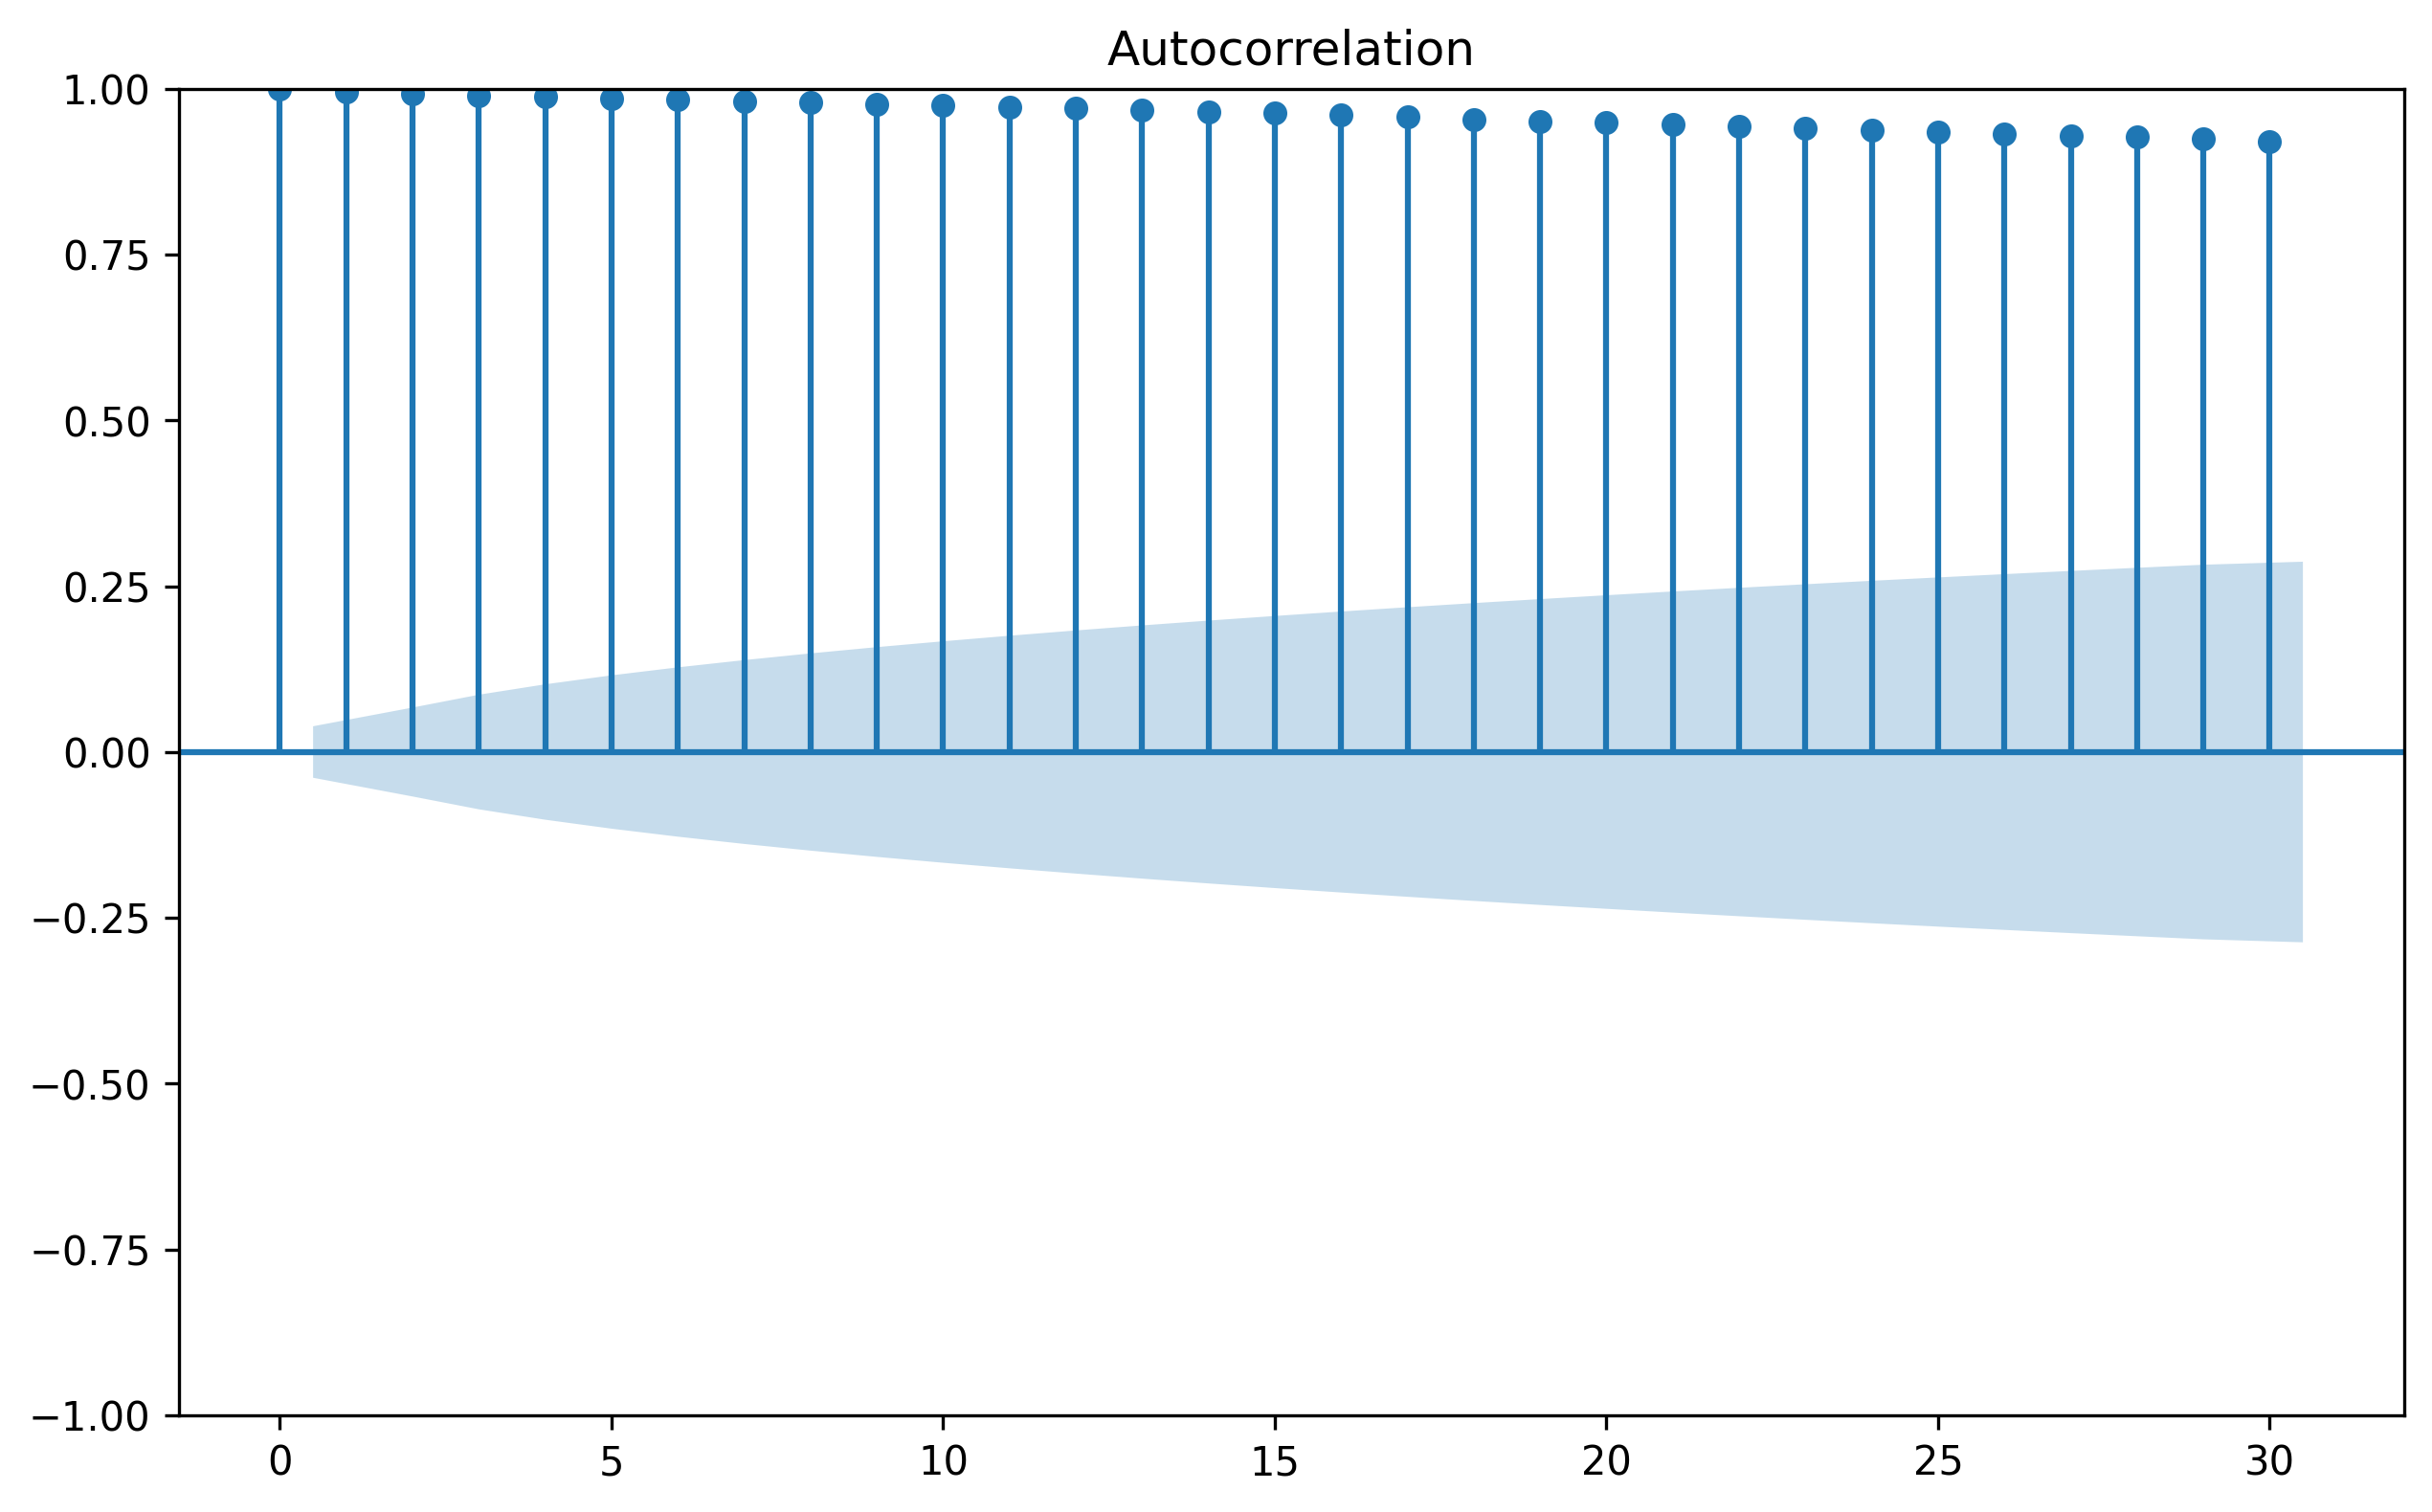

In [16]:
plot_acf(df1['Close'], lags=30);

In [17]:
pacf_values = pacf(df1['Close'])
pacf_values

array([ 1.        ,  0.99582332,  0.22272733,  0.08186507,  0.05596591,
        0.01609926,  0.00579168,  0.00815262,  0.01598294, -0.00214423,
       -0.01706115,  0.02100389,  0.02437011, -0.02033685, -0.05774538,
       -0.03982929, -0.05704761, -0.04481013, -0.02463929,  0.01580818,
        0.02259557, -0.00314346,  0.0207706 , -0.03543404,  0.00617241,
        0.00245938,  0.01328702,  0.02457367,  0.0070767 ,  0.0129677 ,
       -0.1020729 , -0.01930676,  0.00668851, -0.04369244,  0.01019687])

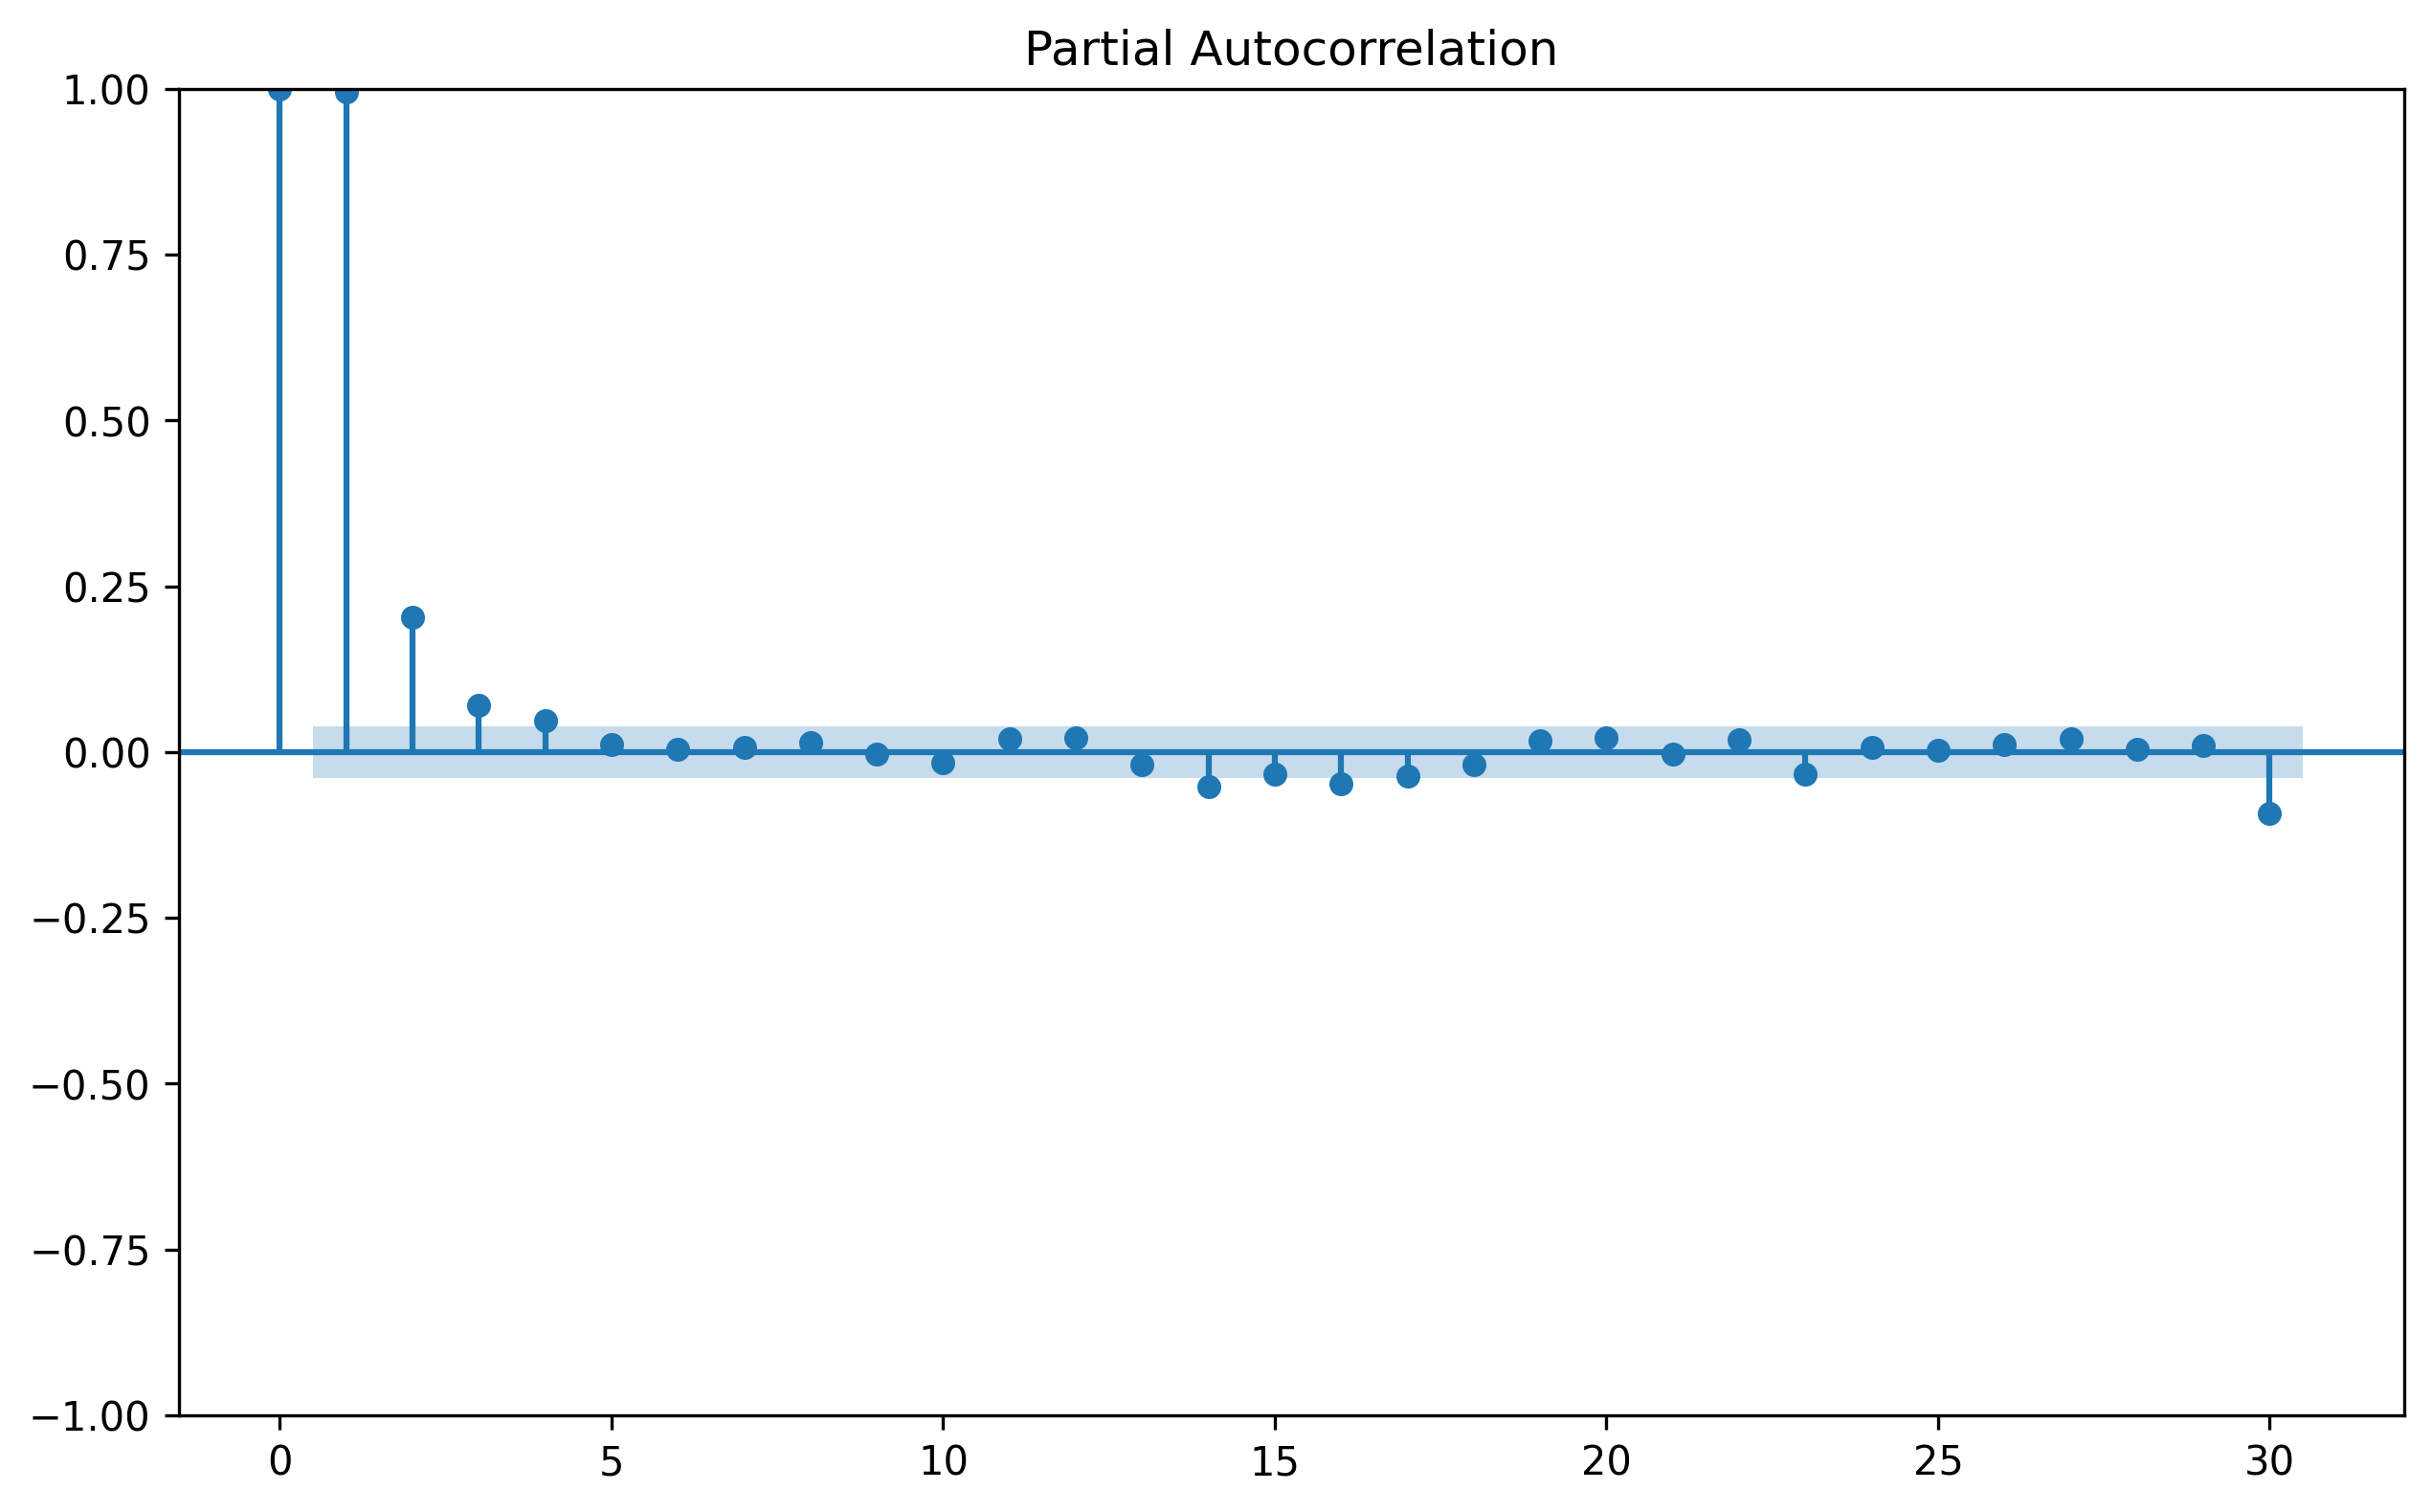

In [18]:
plot_pacf(df1['Close'], lags=30);

### ADFuller Test

In [19]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of lags : ",dftest[2])
    print("4. Num of Observsation used for ADF Regresstion and critical value Calculation:", dftest[3])
    print("5. Critical Values : ")
    for key, value in dftest[4].items():
        print("\t",key, ":", value)

In [20]:
ad_test(df1['Close'])

1. ADF :  -1.8220097655030463
2. P-Value :  0.3695904949148178
3. Num of lags :  16
4. Num of Observsation used for ADF Regresstion and critical value Calculation: 2531
5. Critical Values : 
	 1% : -3.432936307610058
	 5% : -2.8626826231161626
	 10% : -2.567378261492694


### First-Order Differencing

In [21]:
df1['First-Order'] = df1['Close'].diff(periods=1)
df1.dropna(inplace=True)
df1

,Close,Volume,Open,High,Low,Year,First-Order
Date,,,,,,,
2012-10-31,86.24,192354.0,85.73,87.19,85.61,2012,0.56
2012-11-01,87.09,185097.0,86.10,87.42,85.92,2012,0.85
2012-11-02,84.86,273619.0,86.91,87.24,84.66,2012,-2.23
2012-11-05,85.65,185846.0,84.65,85.90,84.34,2012,0.79
2012-11-06,88.71,270163.0,85.67,89.22,85.42,2012,3.06
...,...,...,...,...,...,...,...
2022-10-24,84.58,238458.0,85.24,85.92,82.63,2022,-0.56
2022-10-25,85.32,226337.0,84.88,86.03,83.06,2022,0.74
2022-10-26,87.91,271474.0,85.07,88.41,84.14,2022,2.59


In [22]:
# ADFuller Test After First-Order Differrecing

adfuller(df1['First-Order'])[1]

1.1704620261390229e-20

In [23]:
#Claculate ACF

acf_values2 = acf(df1['First-Order'])
acf_values2

array([ 1.00000000e+00, -2.22927241e-01, -2.91339420e-02, -1.89345974e-02,
        6.26856248e-03, -6.26125614e-03,  2.91406893e-04, -1.23664815e-02,
        1.23305061e-02,  1.02063497e-02, -2.73785033e-02, -2.25121354e-02,
        3.42216321e-02,  3.85105168e-02,  1.38276018e-03,  3.24190564e-02,
        1.89575236e-02,  2.54656571e-03, -2.77408716e-02, -9.97834838e-03,
        2.16313471e-02, -2.03927844e-02,  3.56543807e-02, -2.05006097e-02,
        4.00900803e-03, -1.35139810e-02, -2.12247915e-02,  1.18350102e-02,
       -3.88696850e-03,  1.00042440e-01, -2.96544795e-02, -2.00313218e-02,
        2.85788175e-02, -2.93941173e-02, -7.56289168e-03])

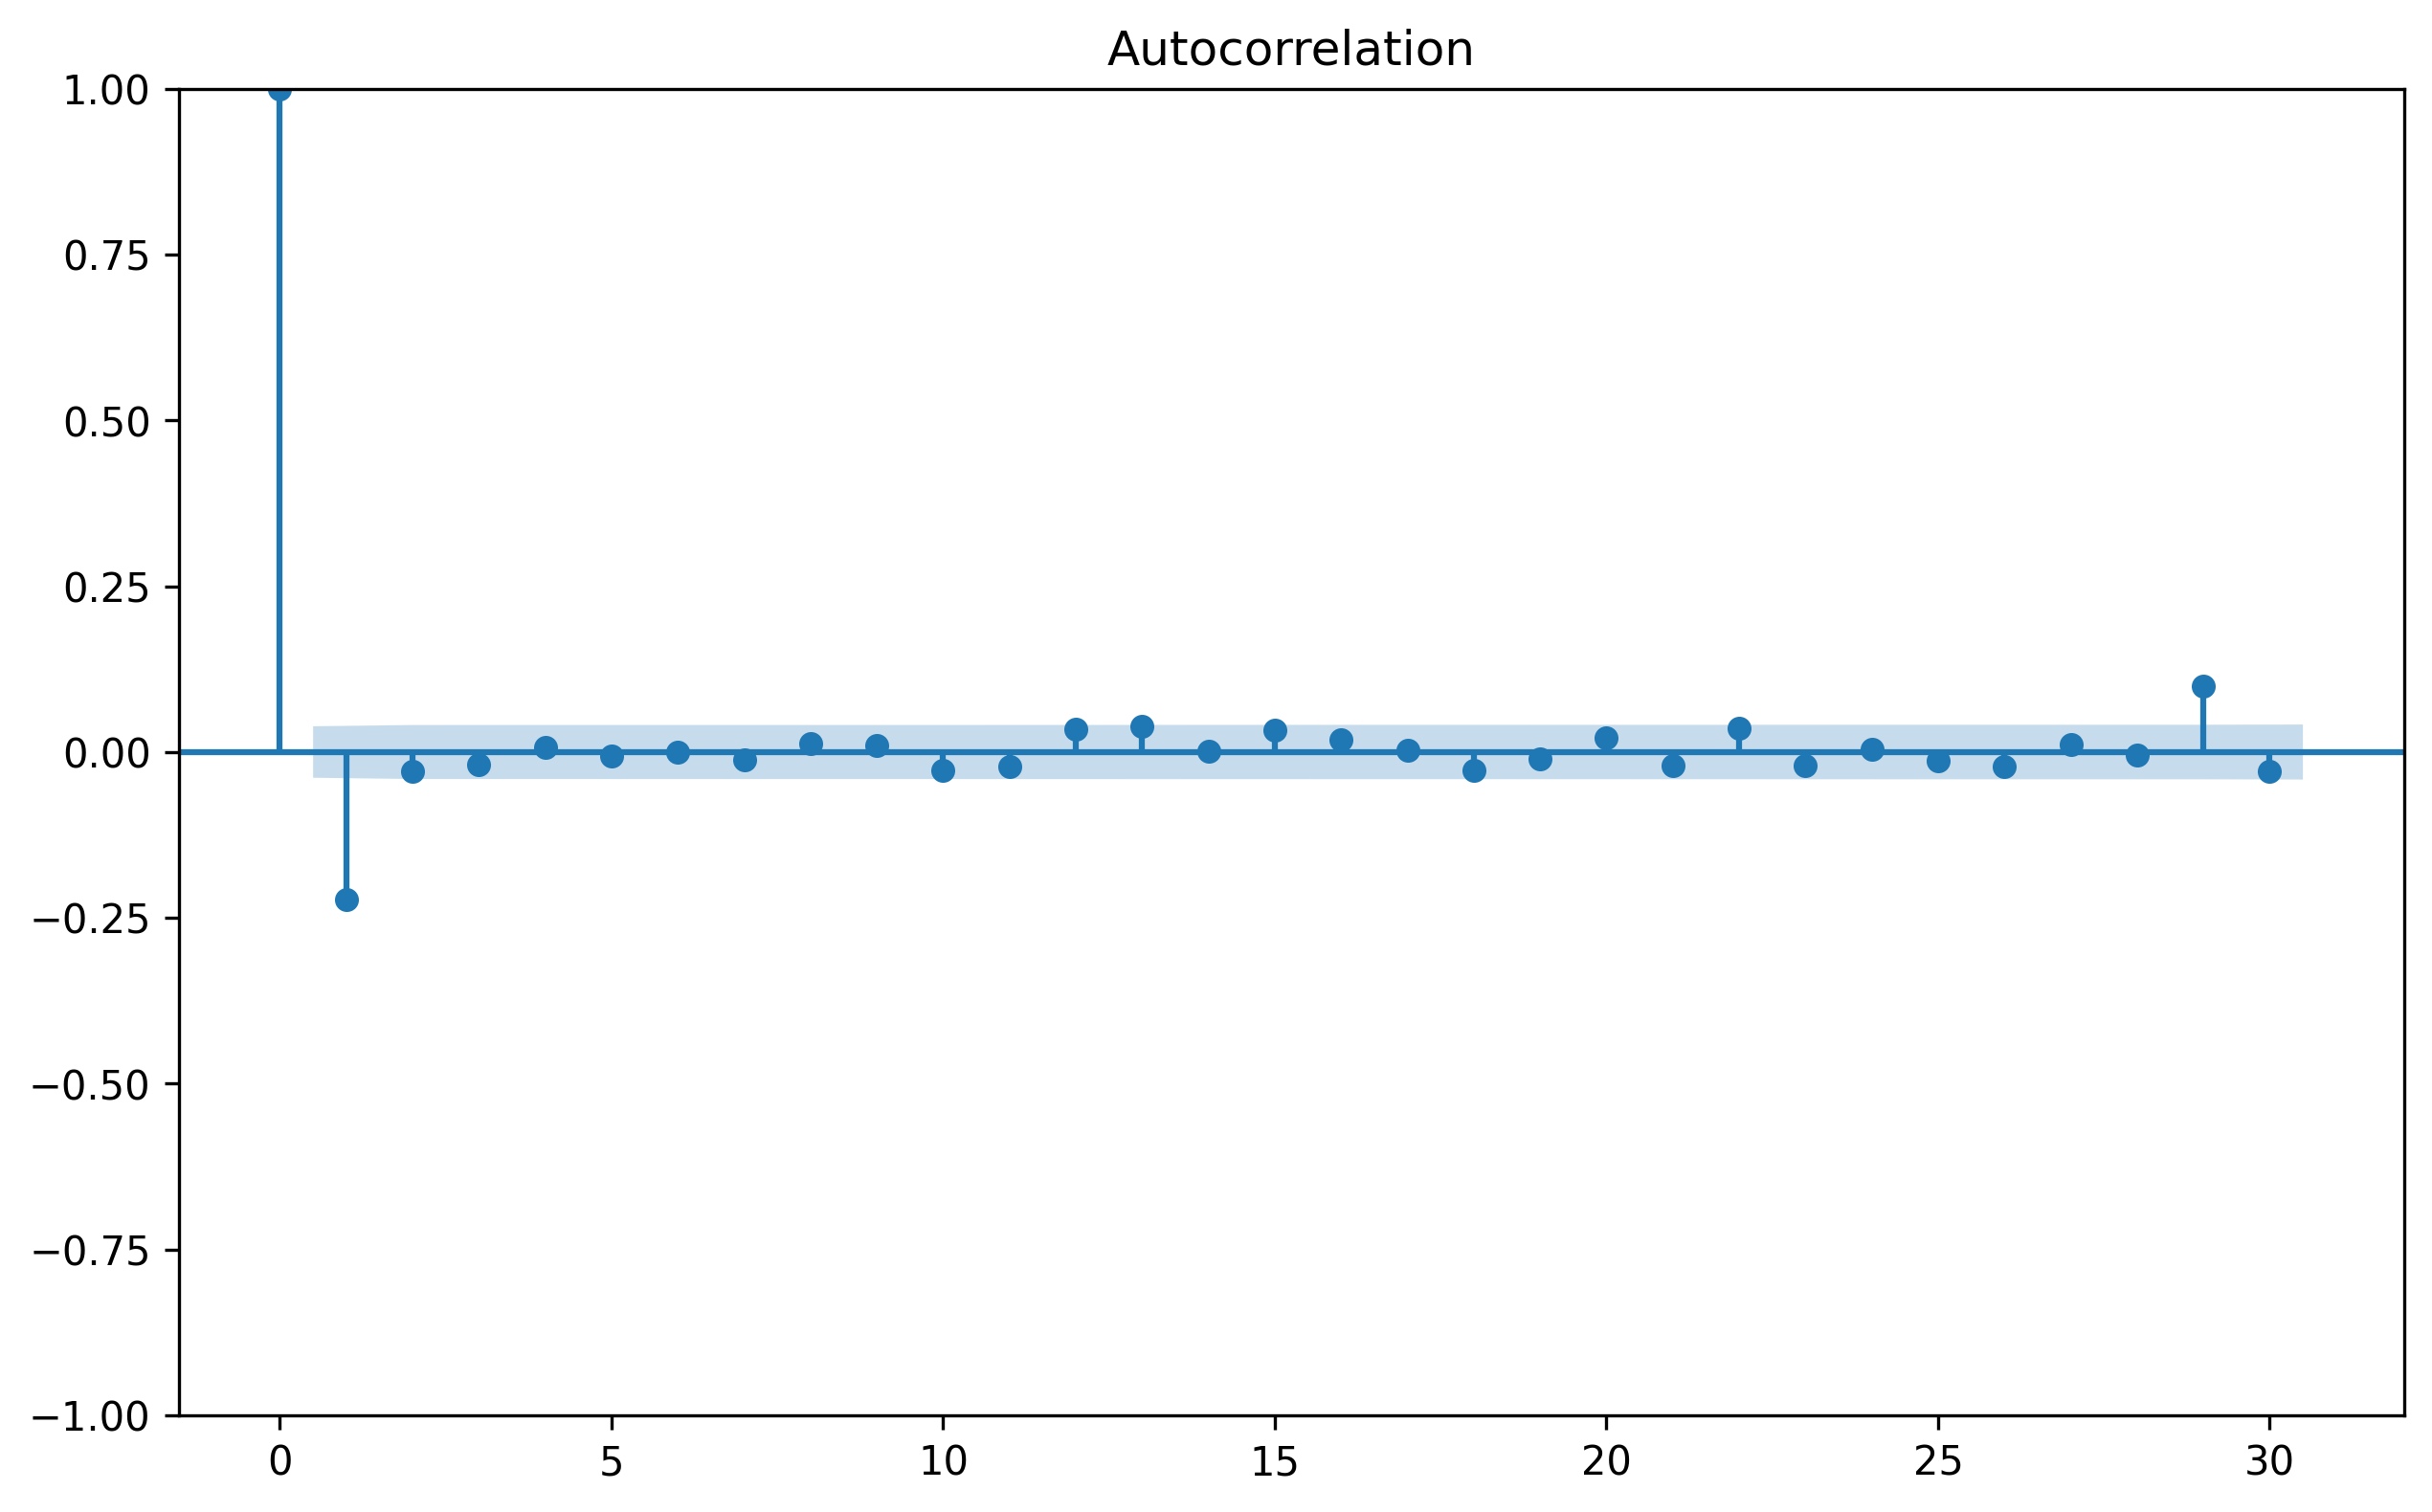

In [24]:
plot_acf(df1['First-Order'], lags=30);

In [25]:
pacf_values2 = pacf(df1['First-Order'])
pacf_values2

array([ 1.        , -0.2230148 , -0.08302157, -0.04716914, -0.01236887,
       -0.01143222, -0.00490065, -0.01526237,  0.00552322,  0.0135639 ,
       -0.02274752, -0.03468812,  0.01922342,  0.04973622,  0.02601903,
        0.04907607,  0.04534947,  0.0249525 , -0.01572154, -0.01640863,
        0.01489999, -0.01779743,  0.03154716, -0.00230361,  0.00257826,
       -0.01426155, -0.03102794, -0.00430654, -0.01538564,  0.09651935,
        0.01613653, -0.01242904,  0.02772473, -0.01854251, -0.01561121])

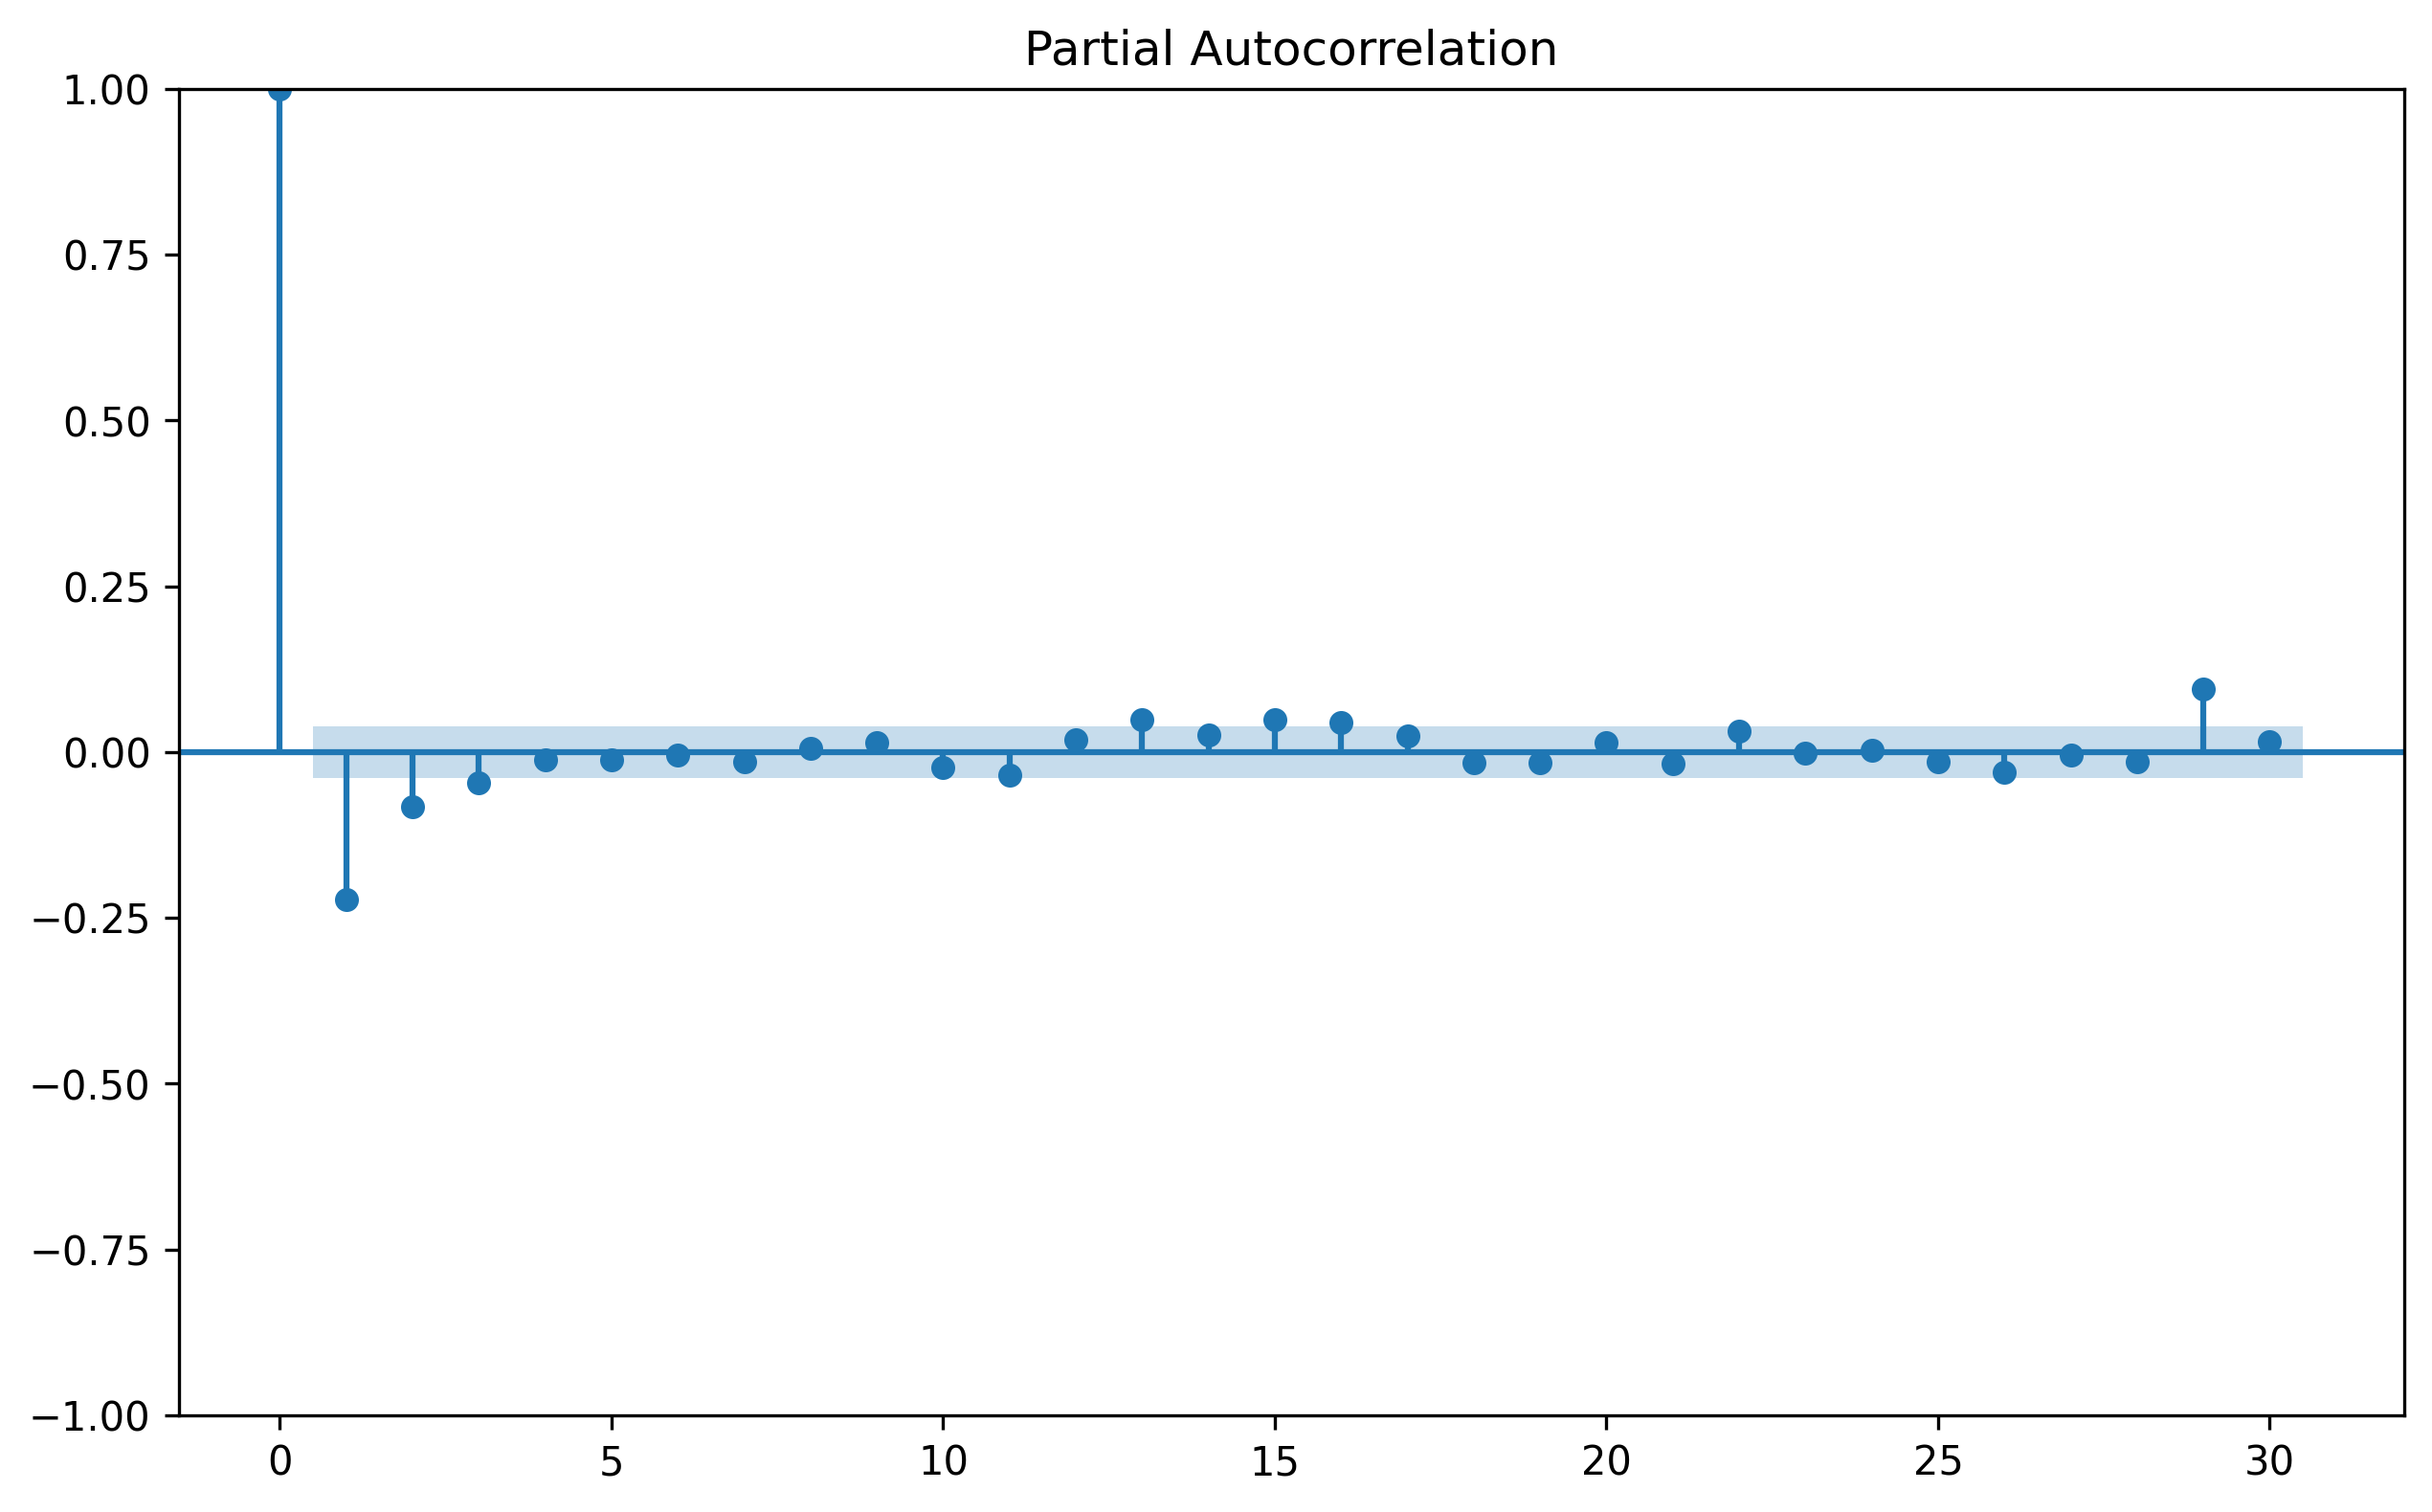

In [26]:
plot_pacf(df1['First-Order'], lags=30);

### Pair Plot for Selected Columns
- This plot shows pairwise relationships between key columns.
- It provides insights into how different features are related. For example, it can help identify if volume and price are correlated

Text(0.5, 1.0, 'Pair Plot for Selected Columns')

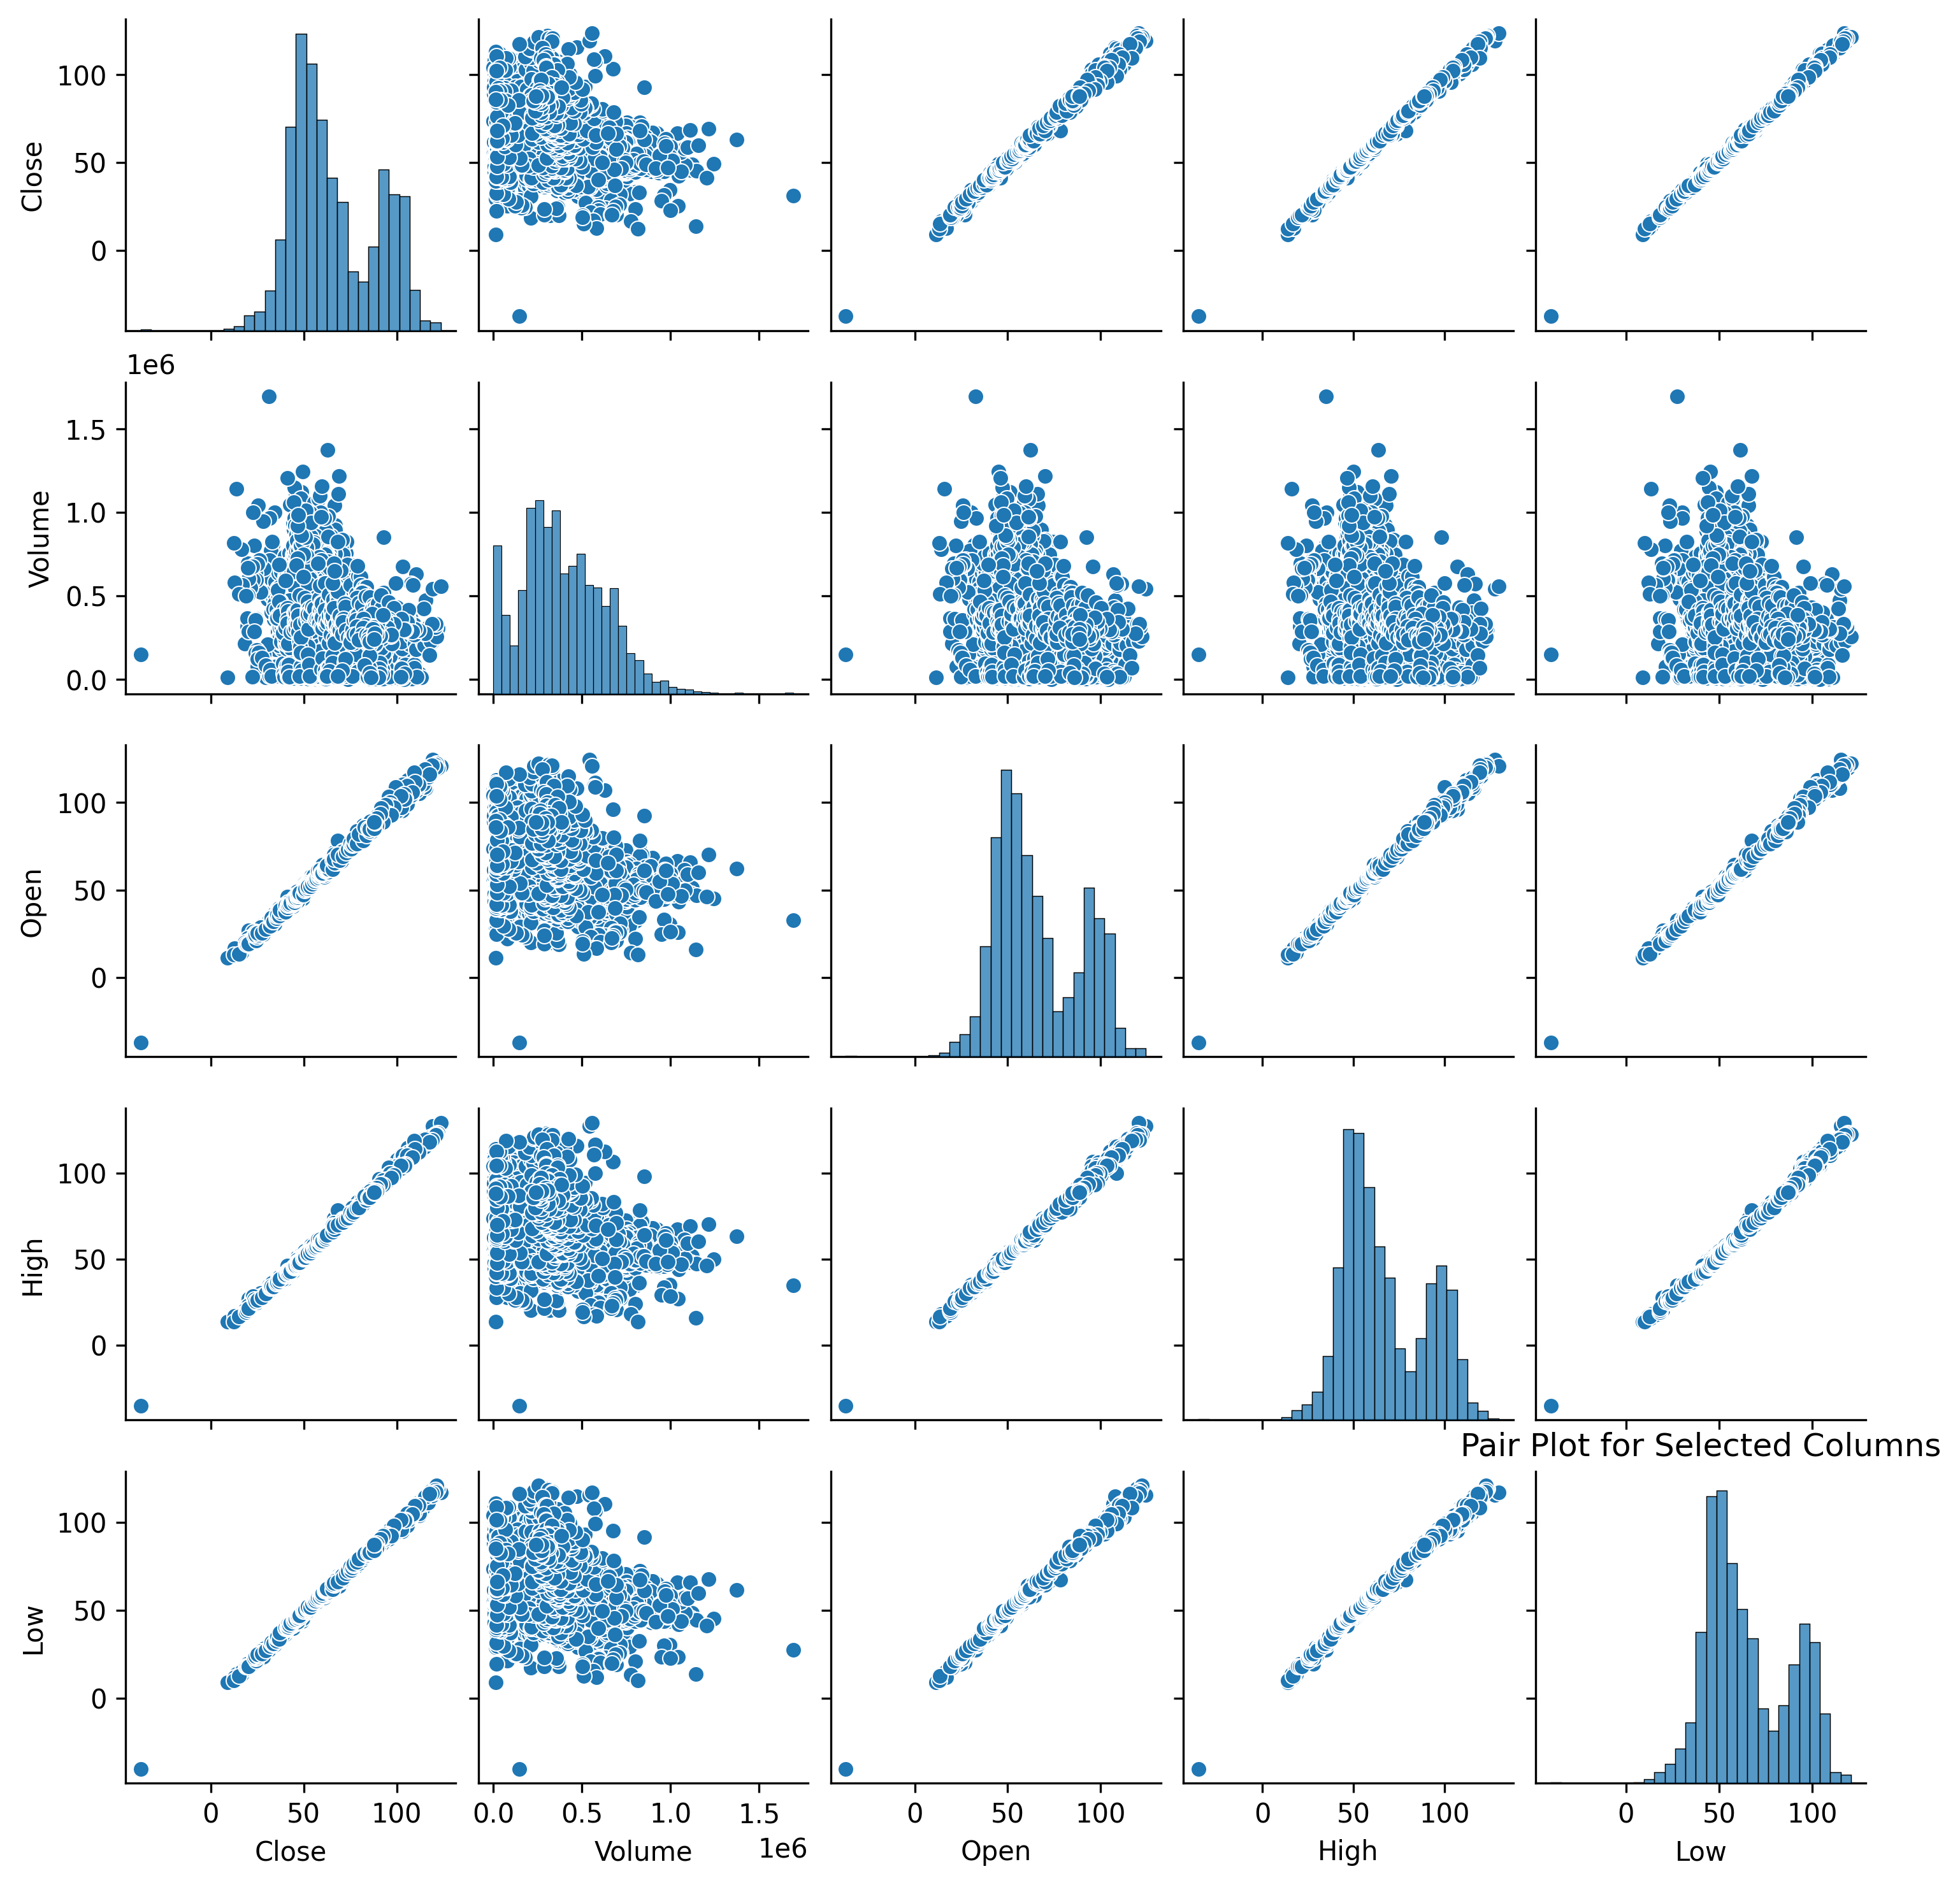

In [27]:
sns.pairplot(df[['Close', 'Volume', 'Open', 'High', 'Low']].dropna(), height=2)
plt.title('Pair Plot for Selected Columns')

### Distplot for all Numerical Columns
-  To check the data distribution in each numerical columns.

In [28]:
numerical_features=[features for features in df.columns if df[features].dtypes =='float']
numerical_features

['Close', 'Volume', 'Open', 'High', 'Low']

Close


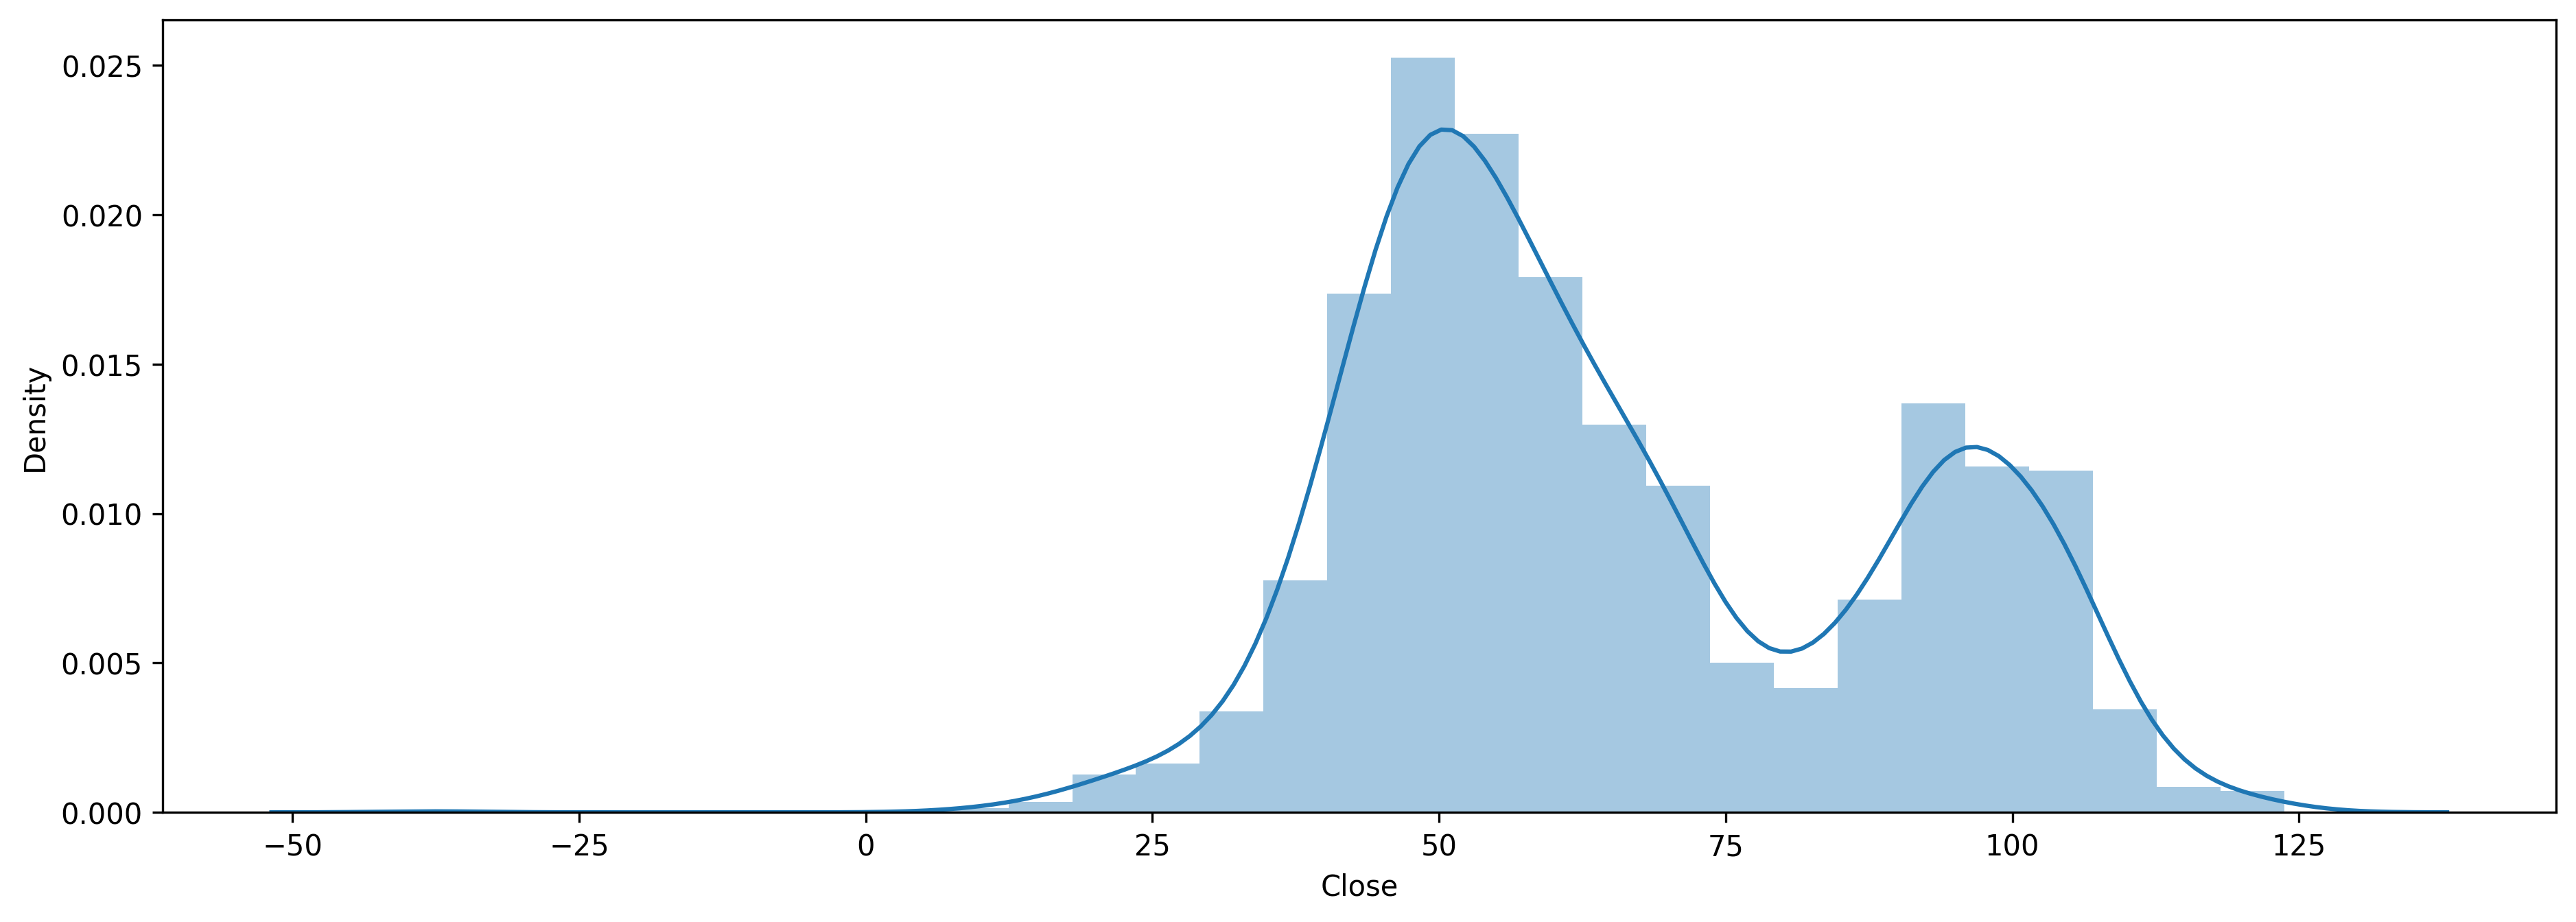

Volume


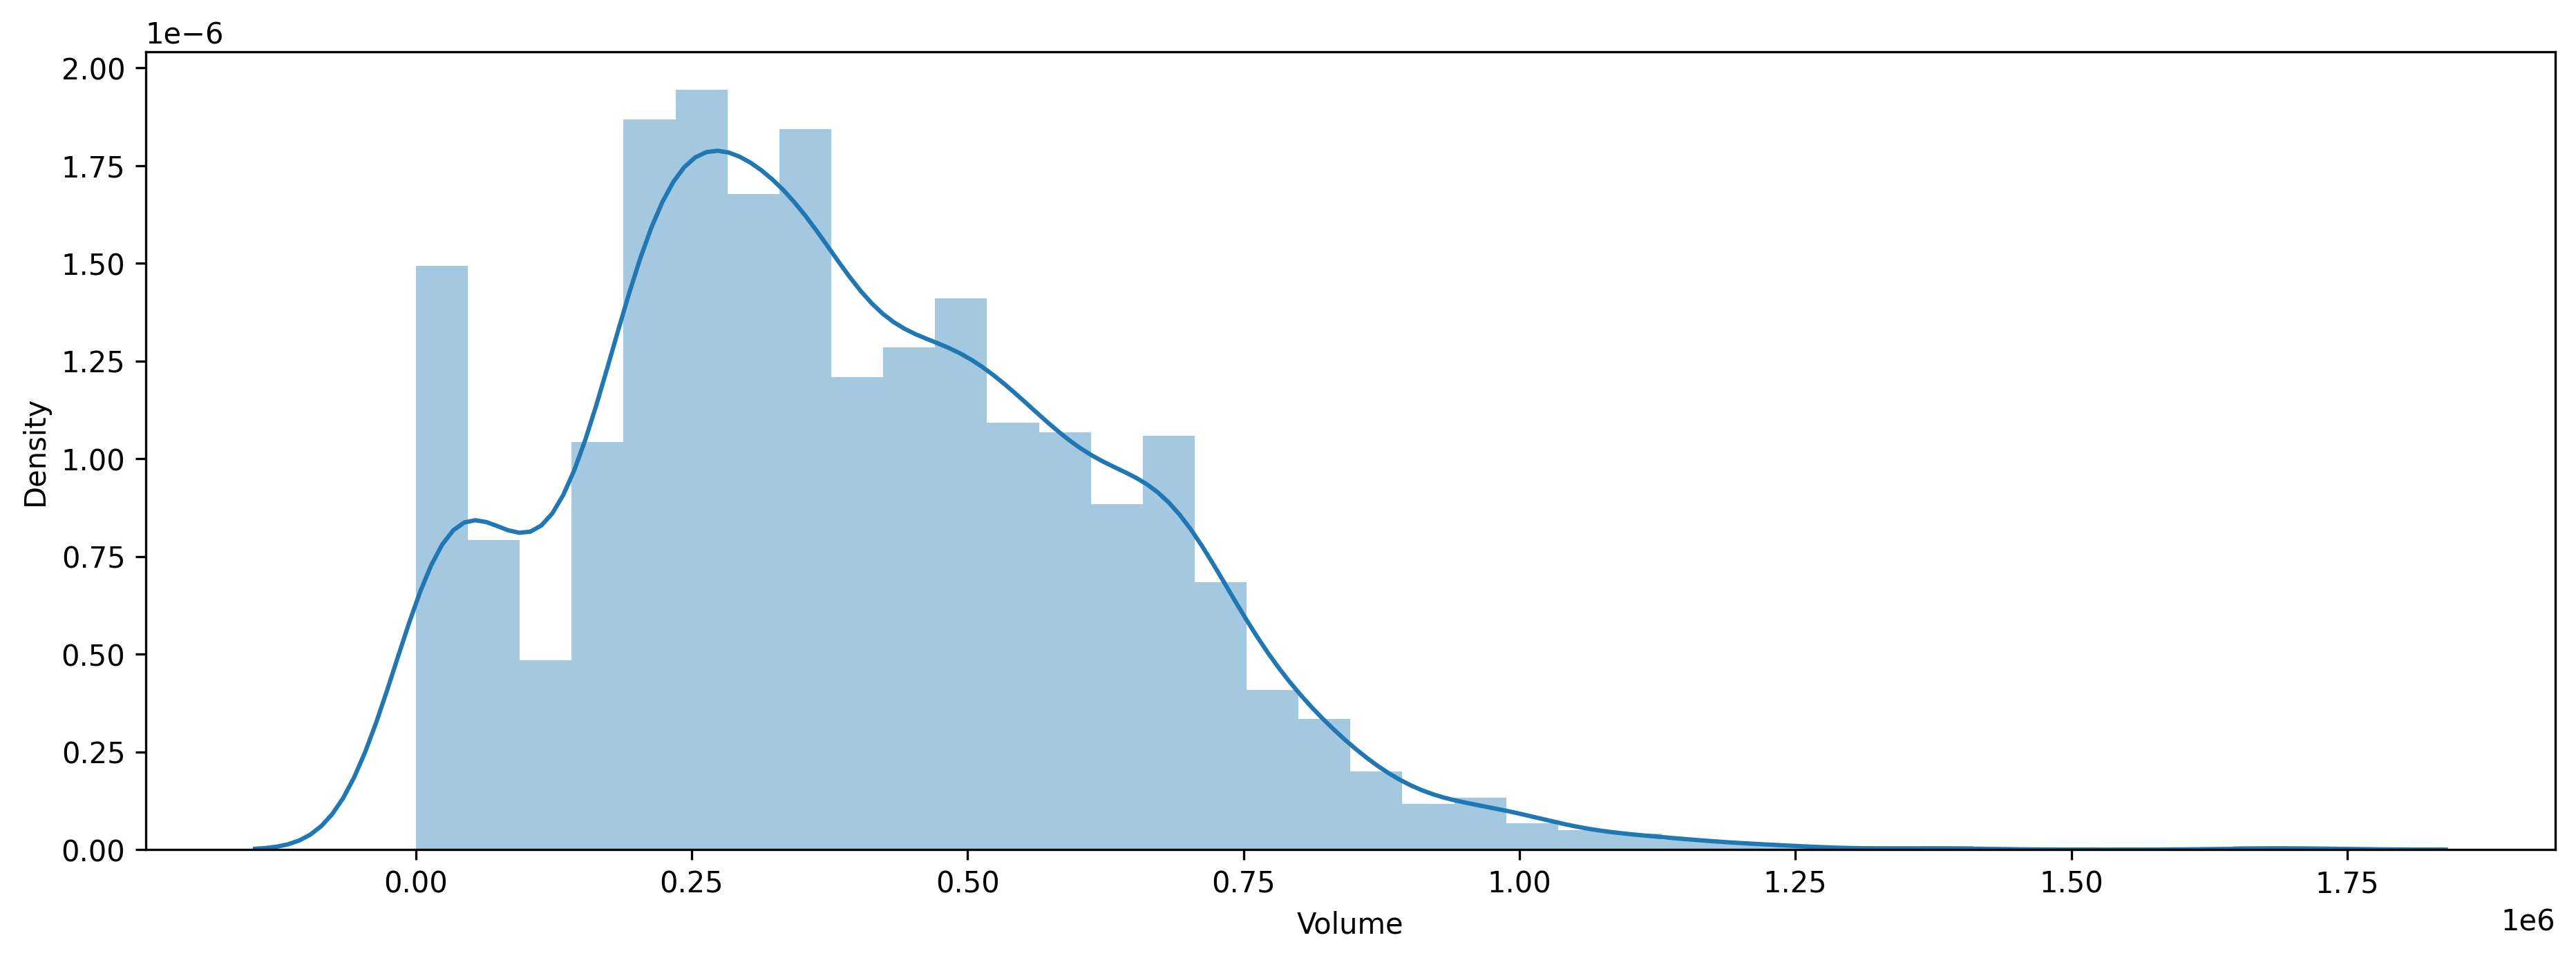

Open


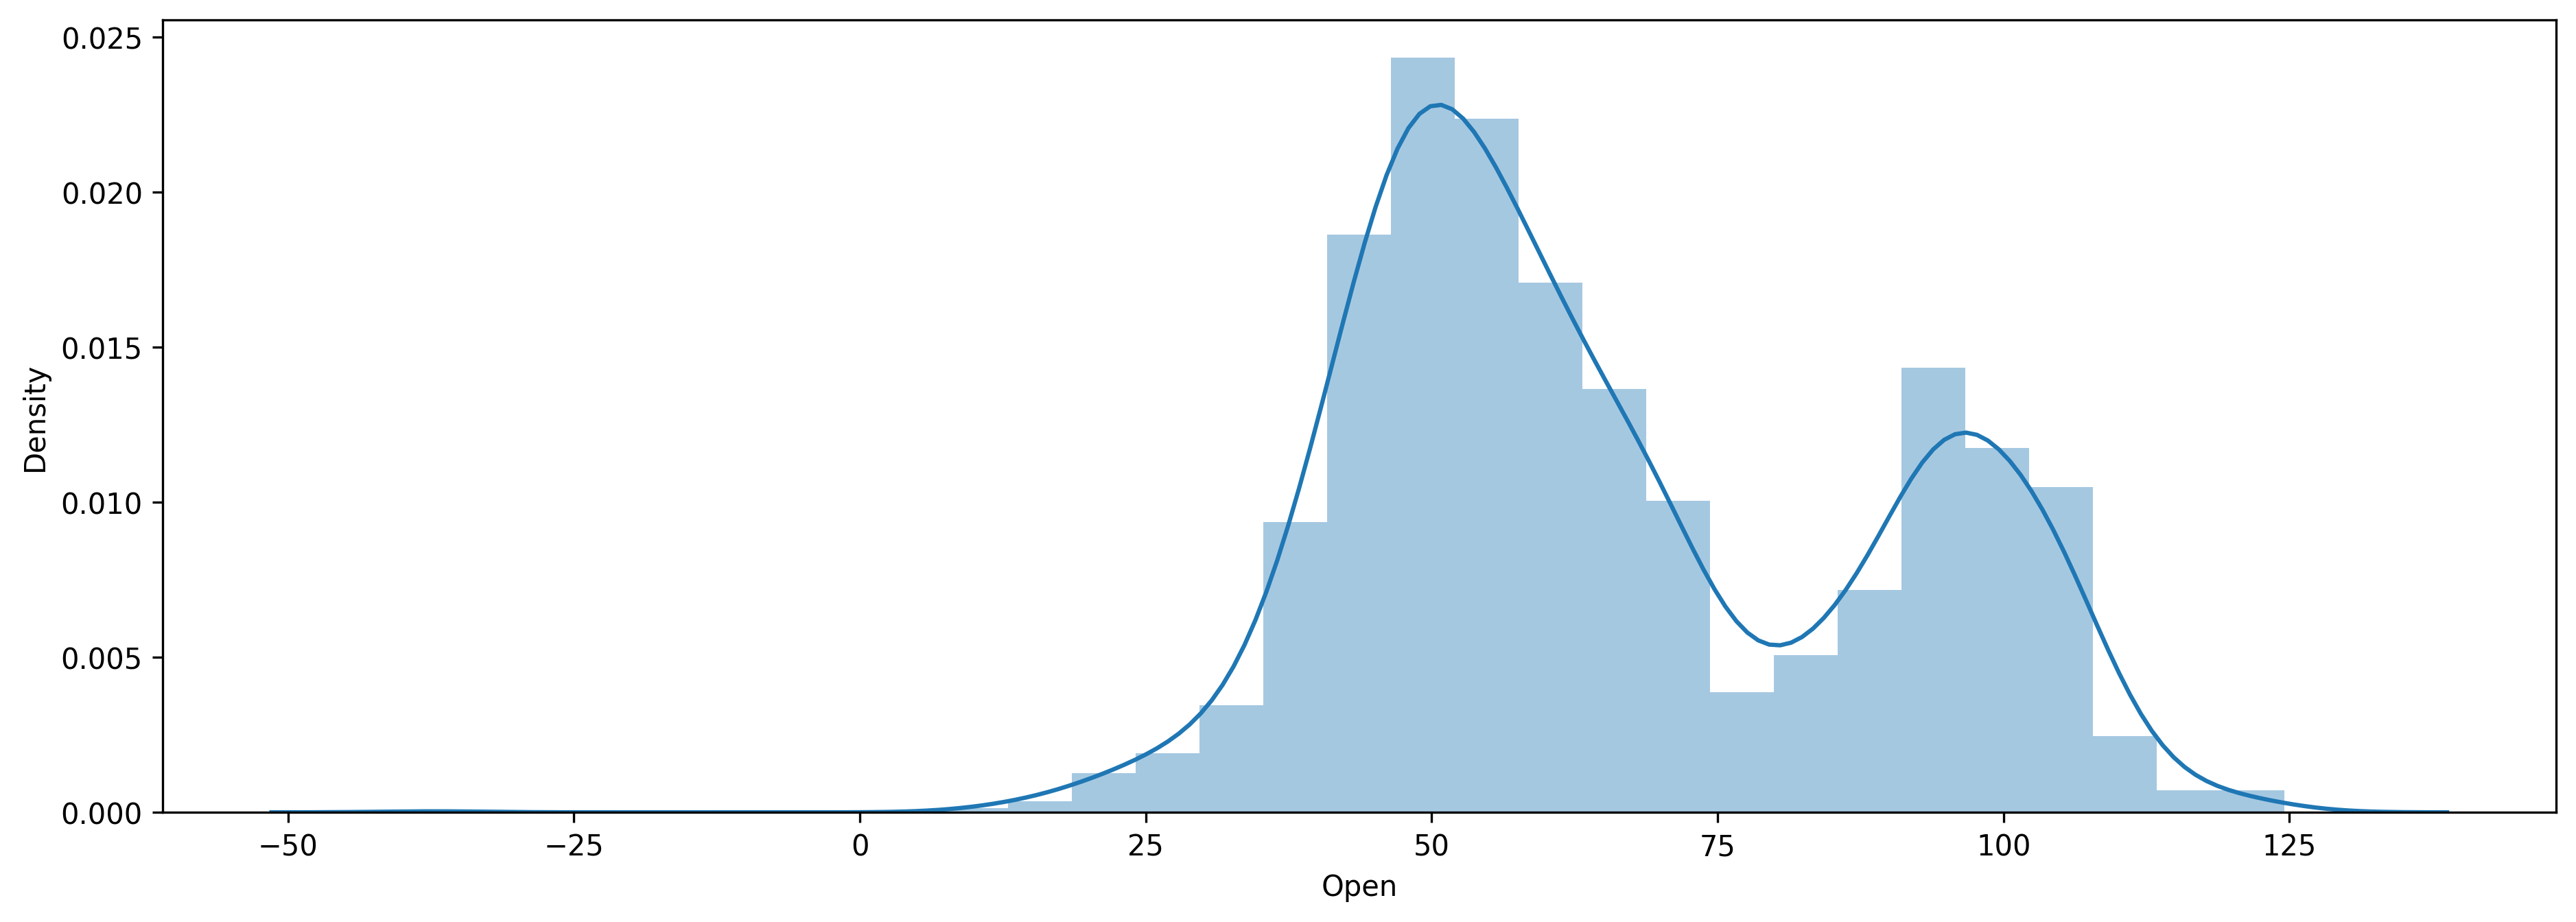

High


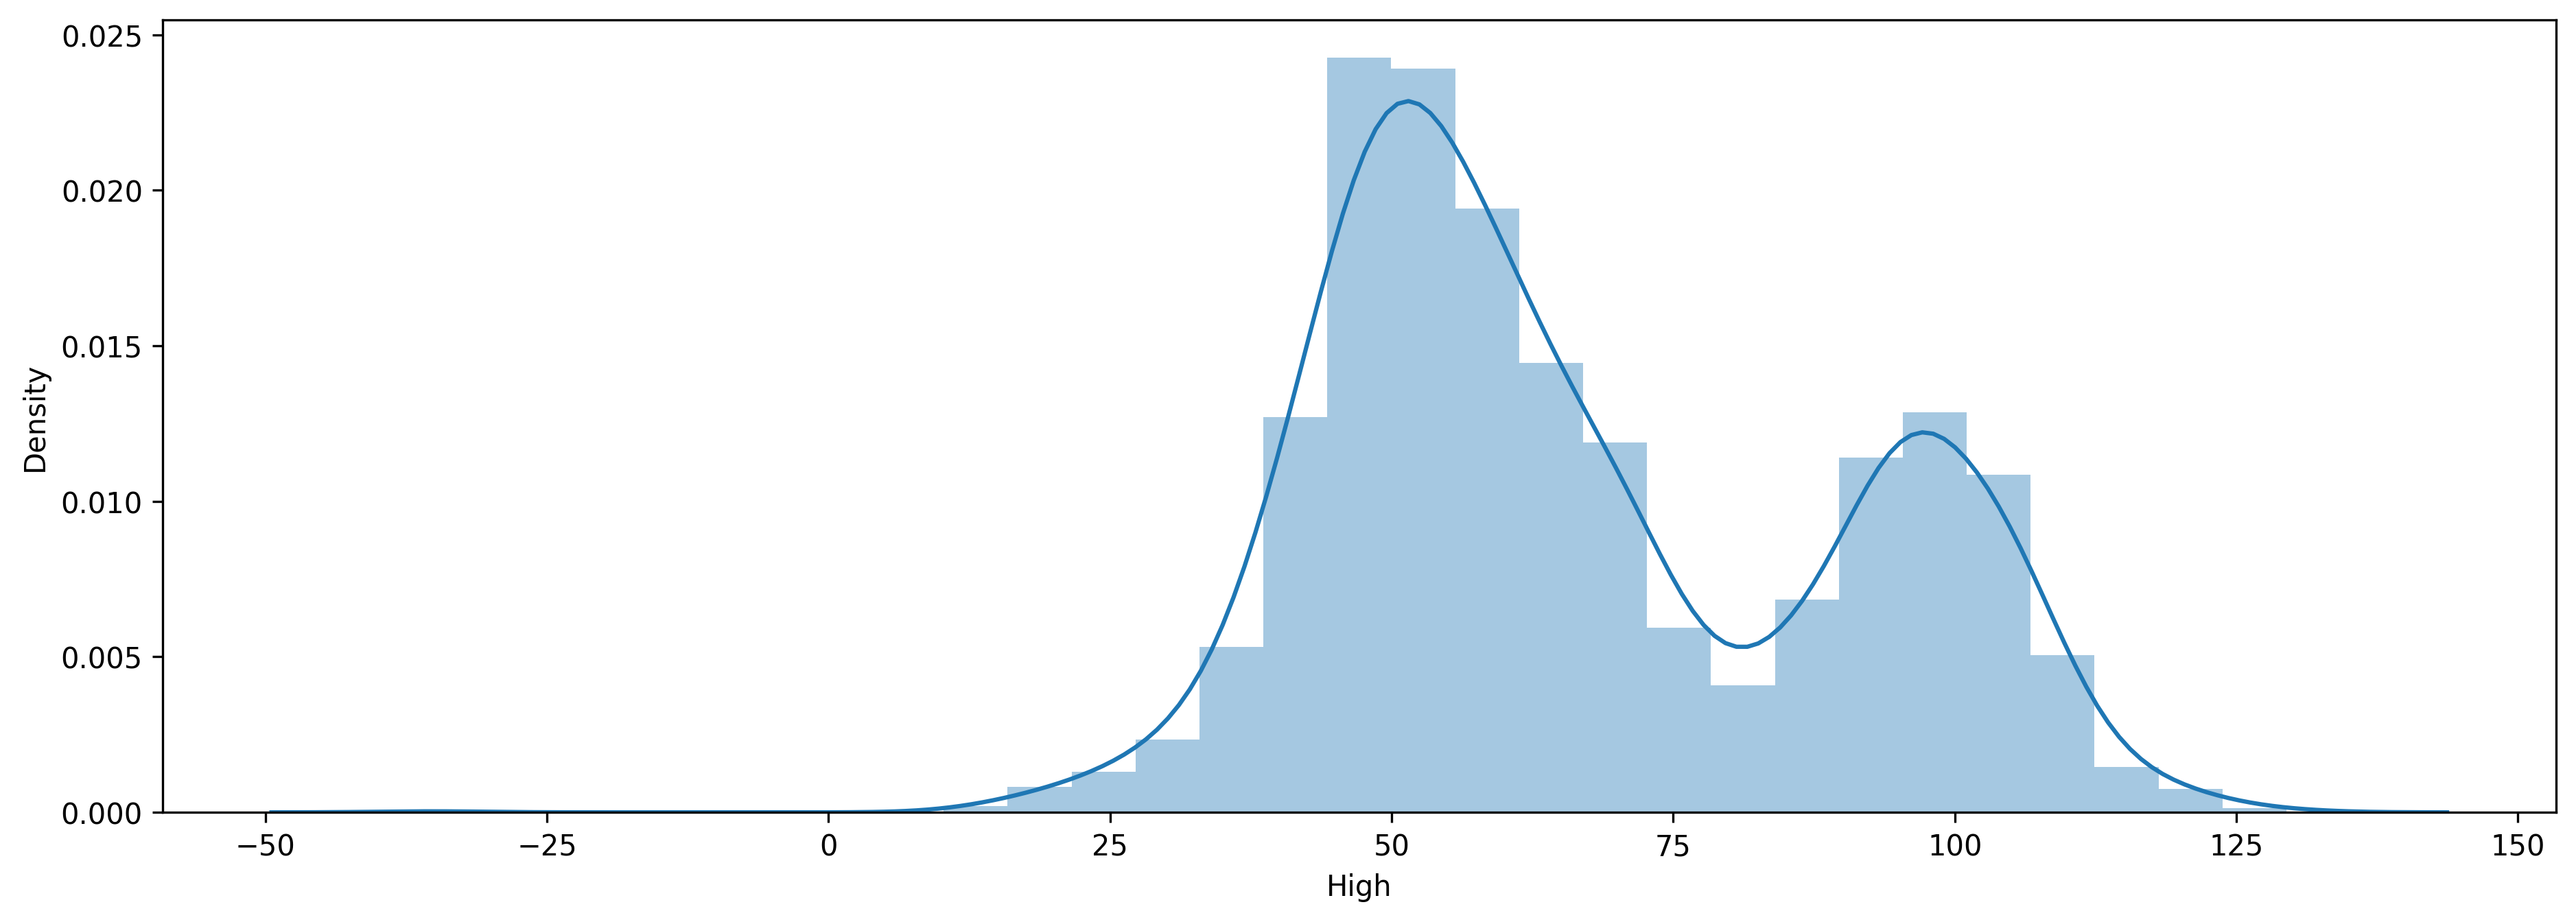

Low


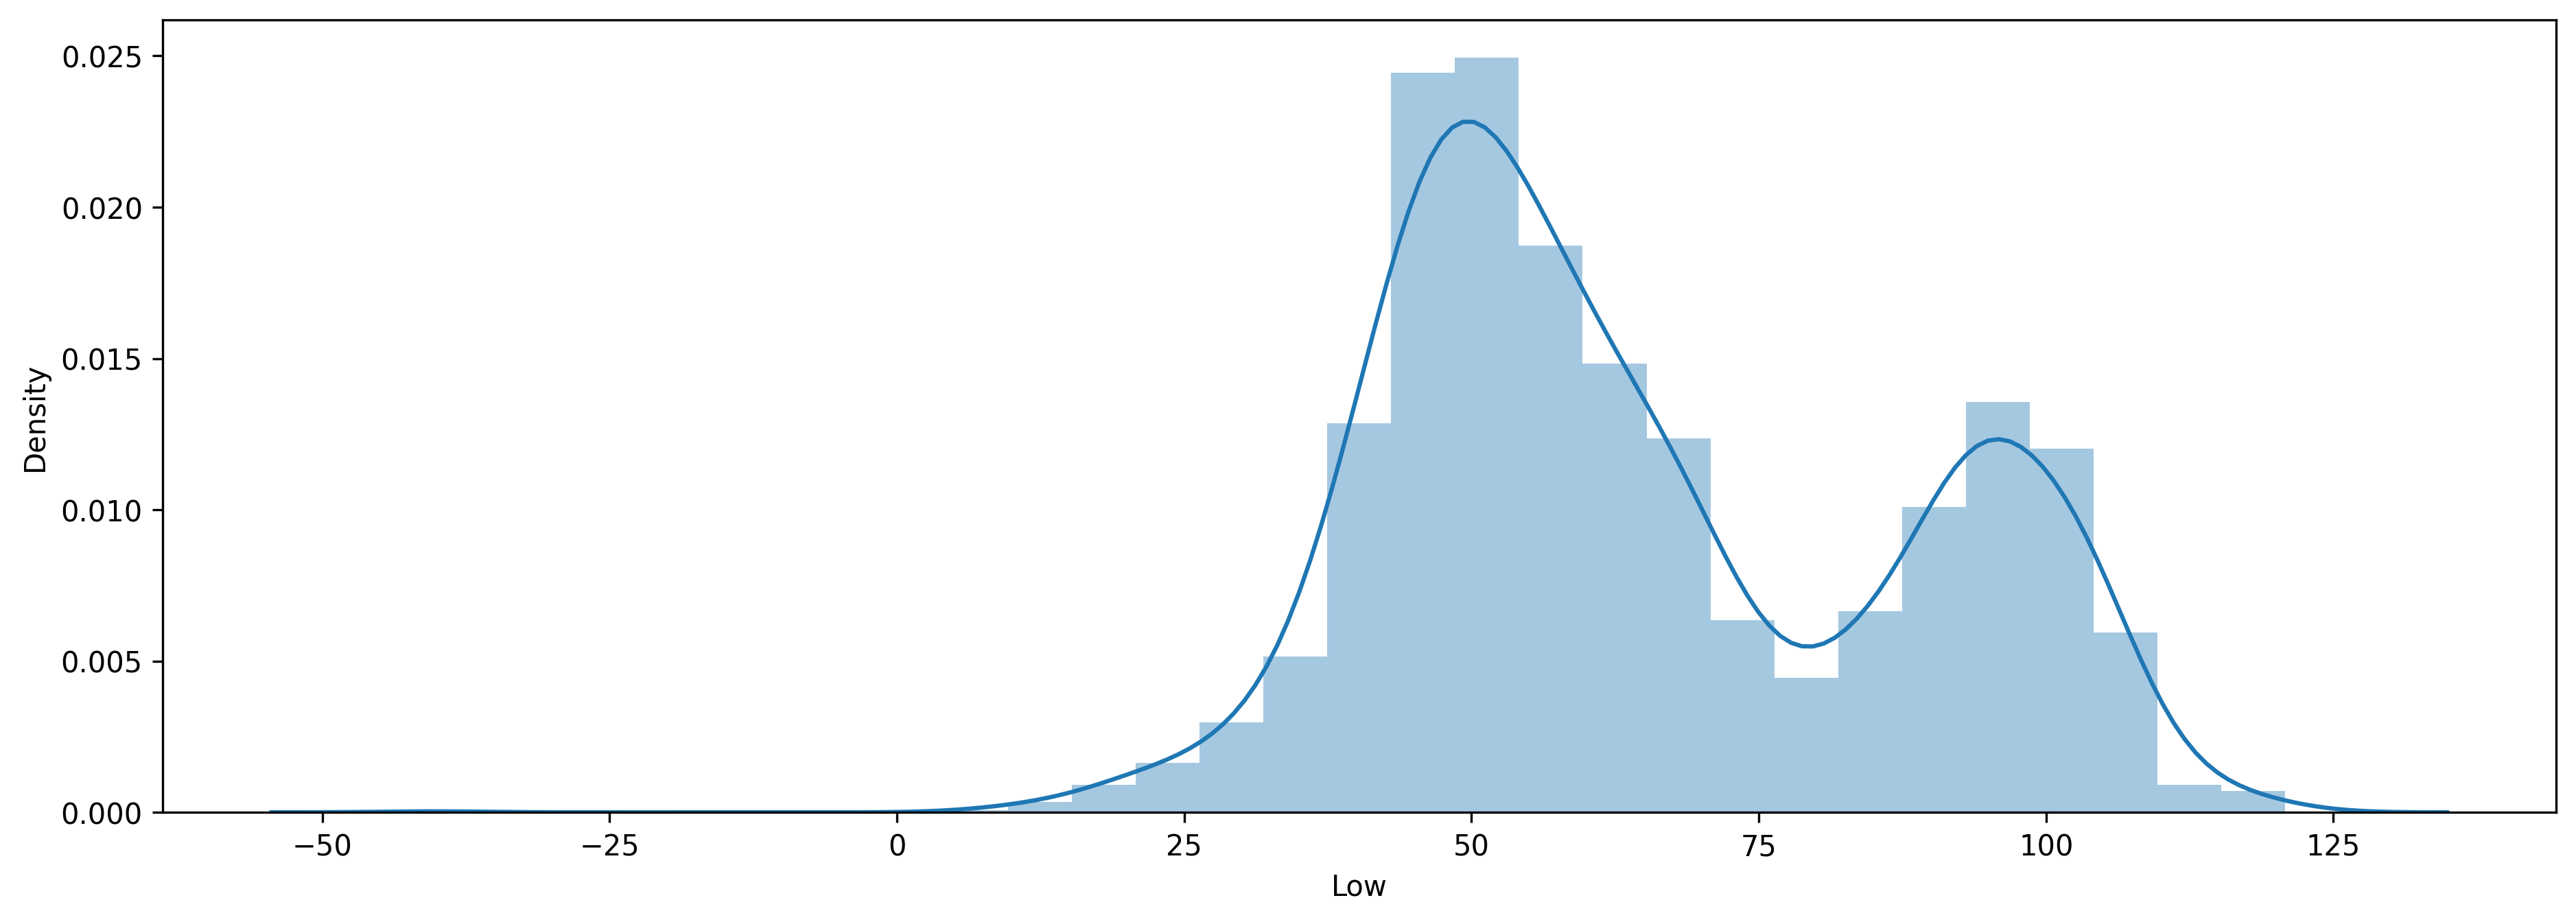

In [29]:
for i in numerical_features:
    print(i)
    plt.figure(figsize=(15,5))
    sns.distplot(df[i])
    plt.show()

### Bar plot for Average, Maximum and Minimum Price

<Figure size 3600x1800 with 0 Axes>

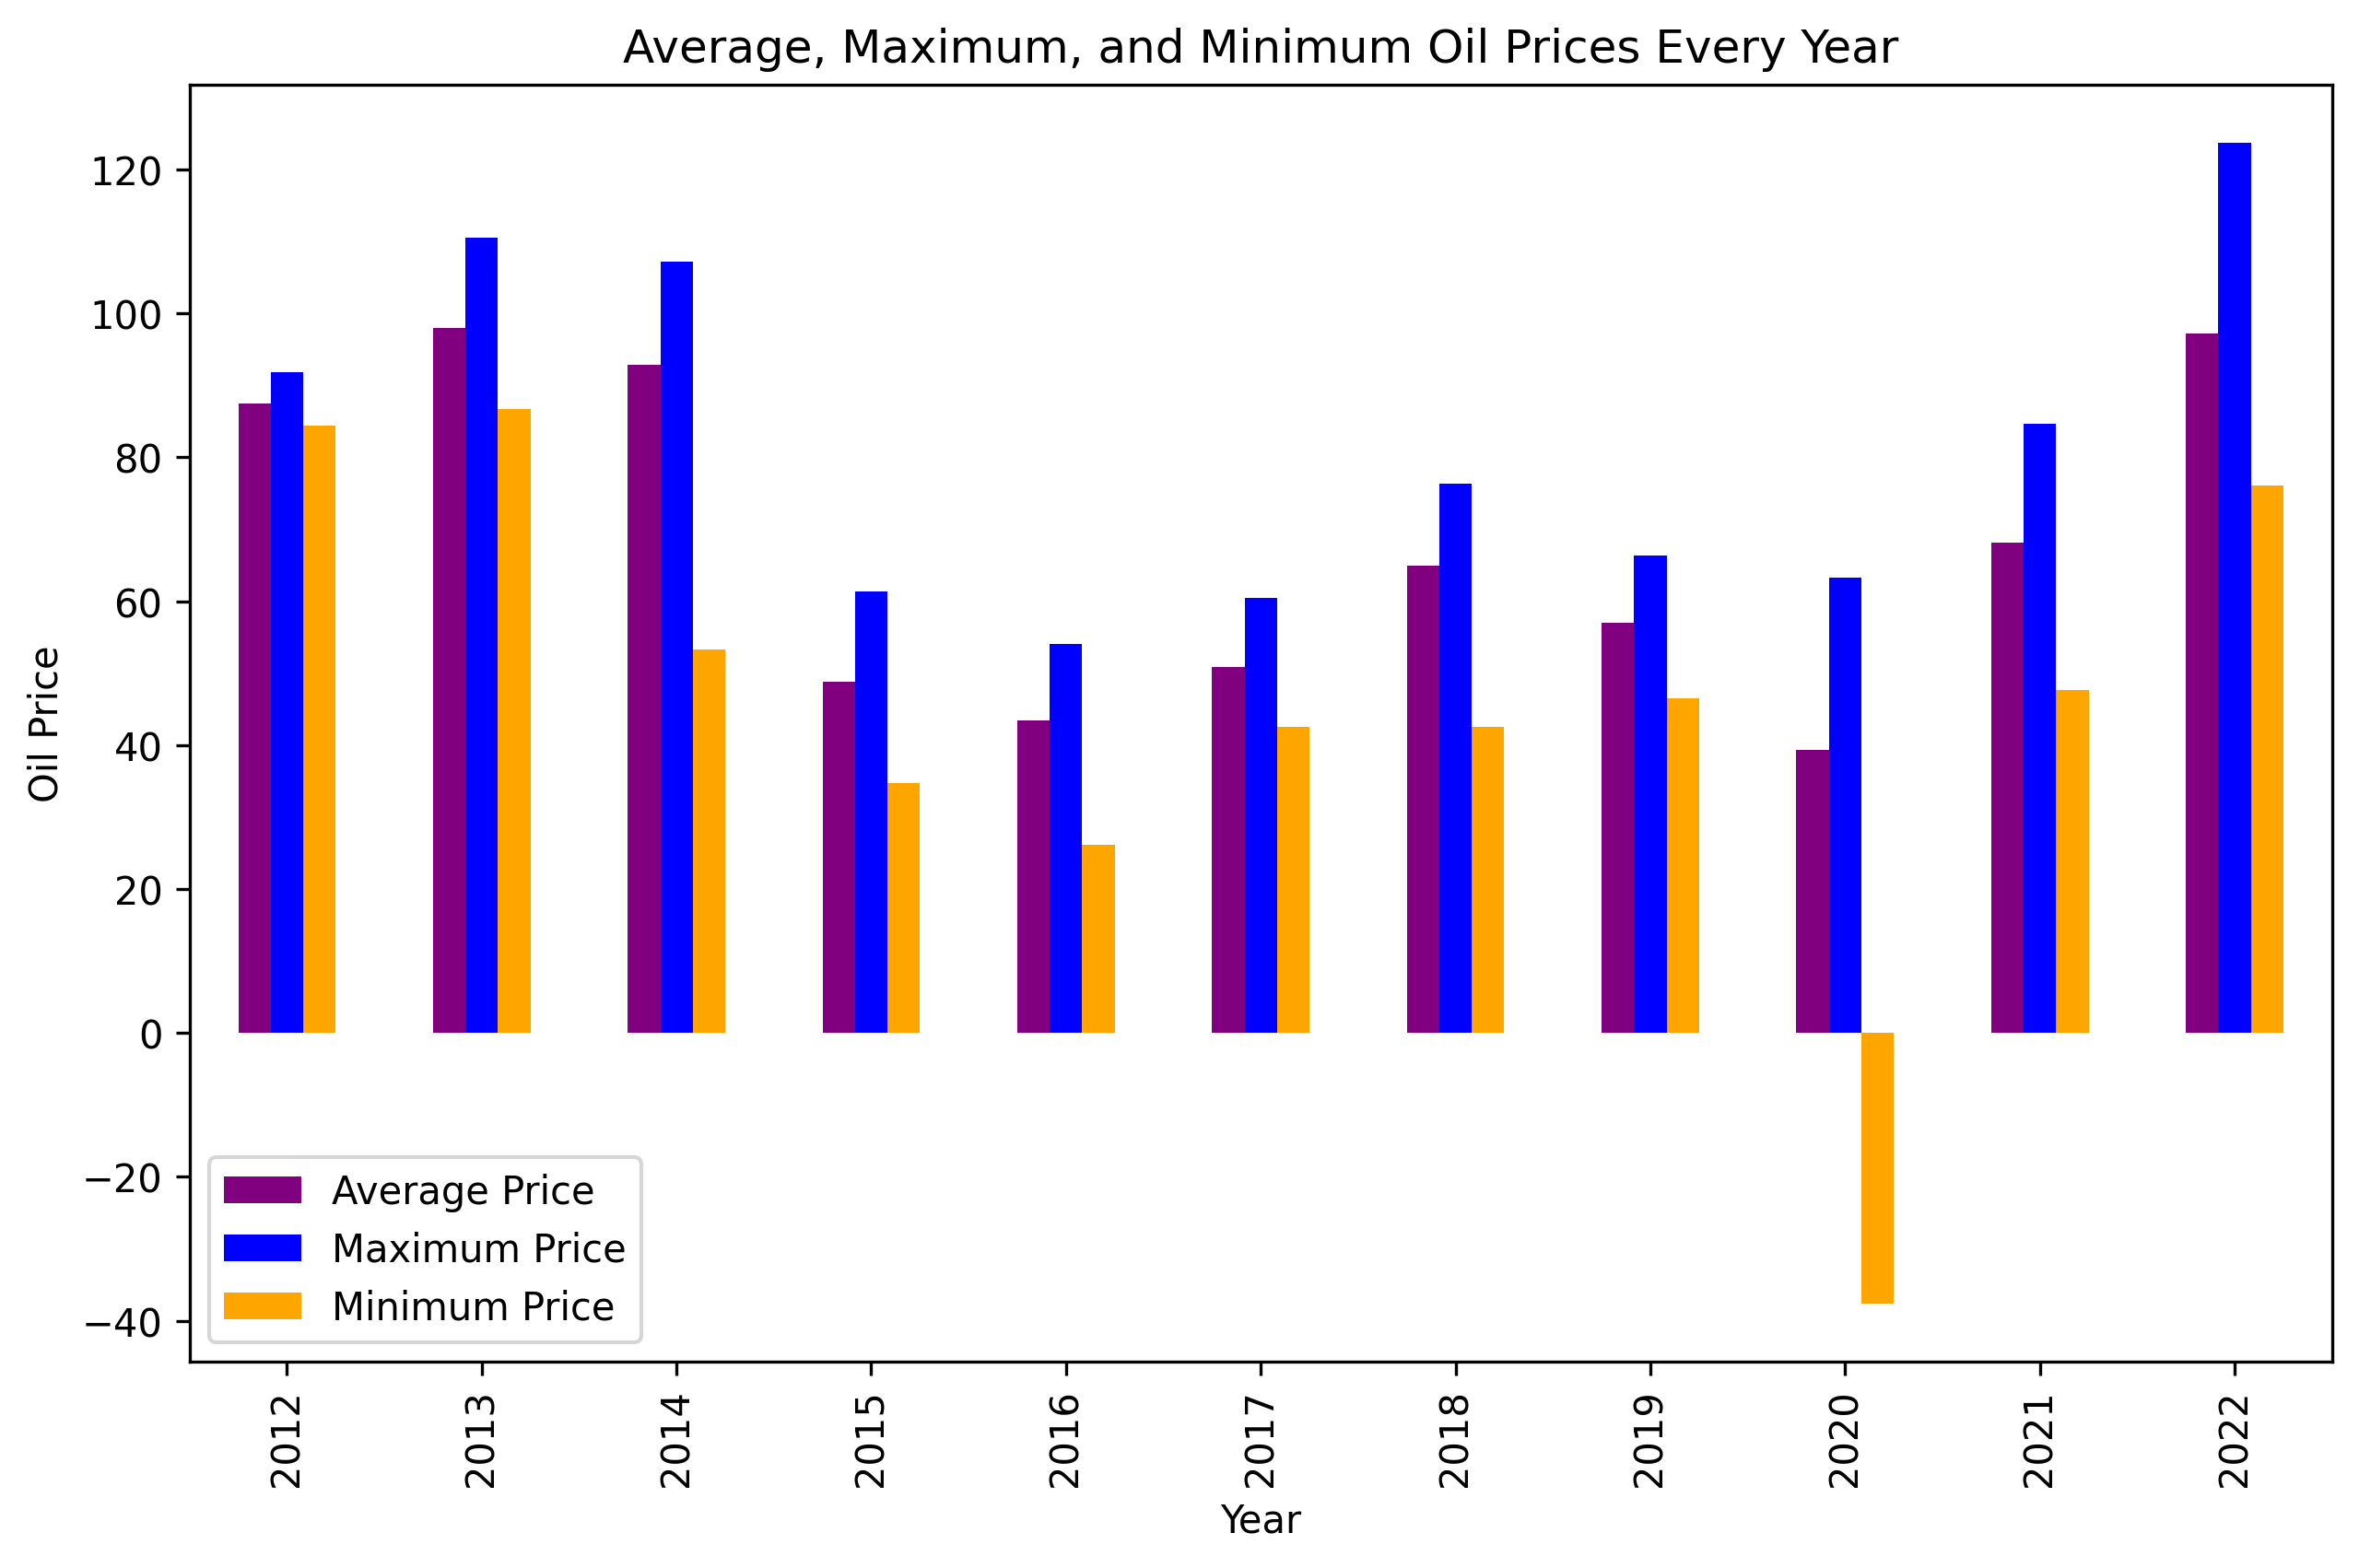

In [30]:
# Calculate the average, maximum, and minimum prices for each year
yearly_stats = df.groupby('Year')['Close'].agg(['mean', 'max', 'min'])

# Plotting the bar plot for average, maximum, and minimum prices every year
plt.figure(figsize=(12, 6))
yearly_stats.plot(kind='bar', color=['purple', 'blue', 'orange'])
plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.title('Average, Maximum, and Minimum Oil Prices Every Year')
plt.legend(['Average Price', 'Maximum Price', 'Minimum Price'])

### Volume Over Time 

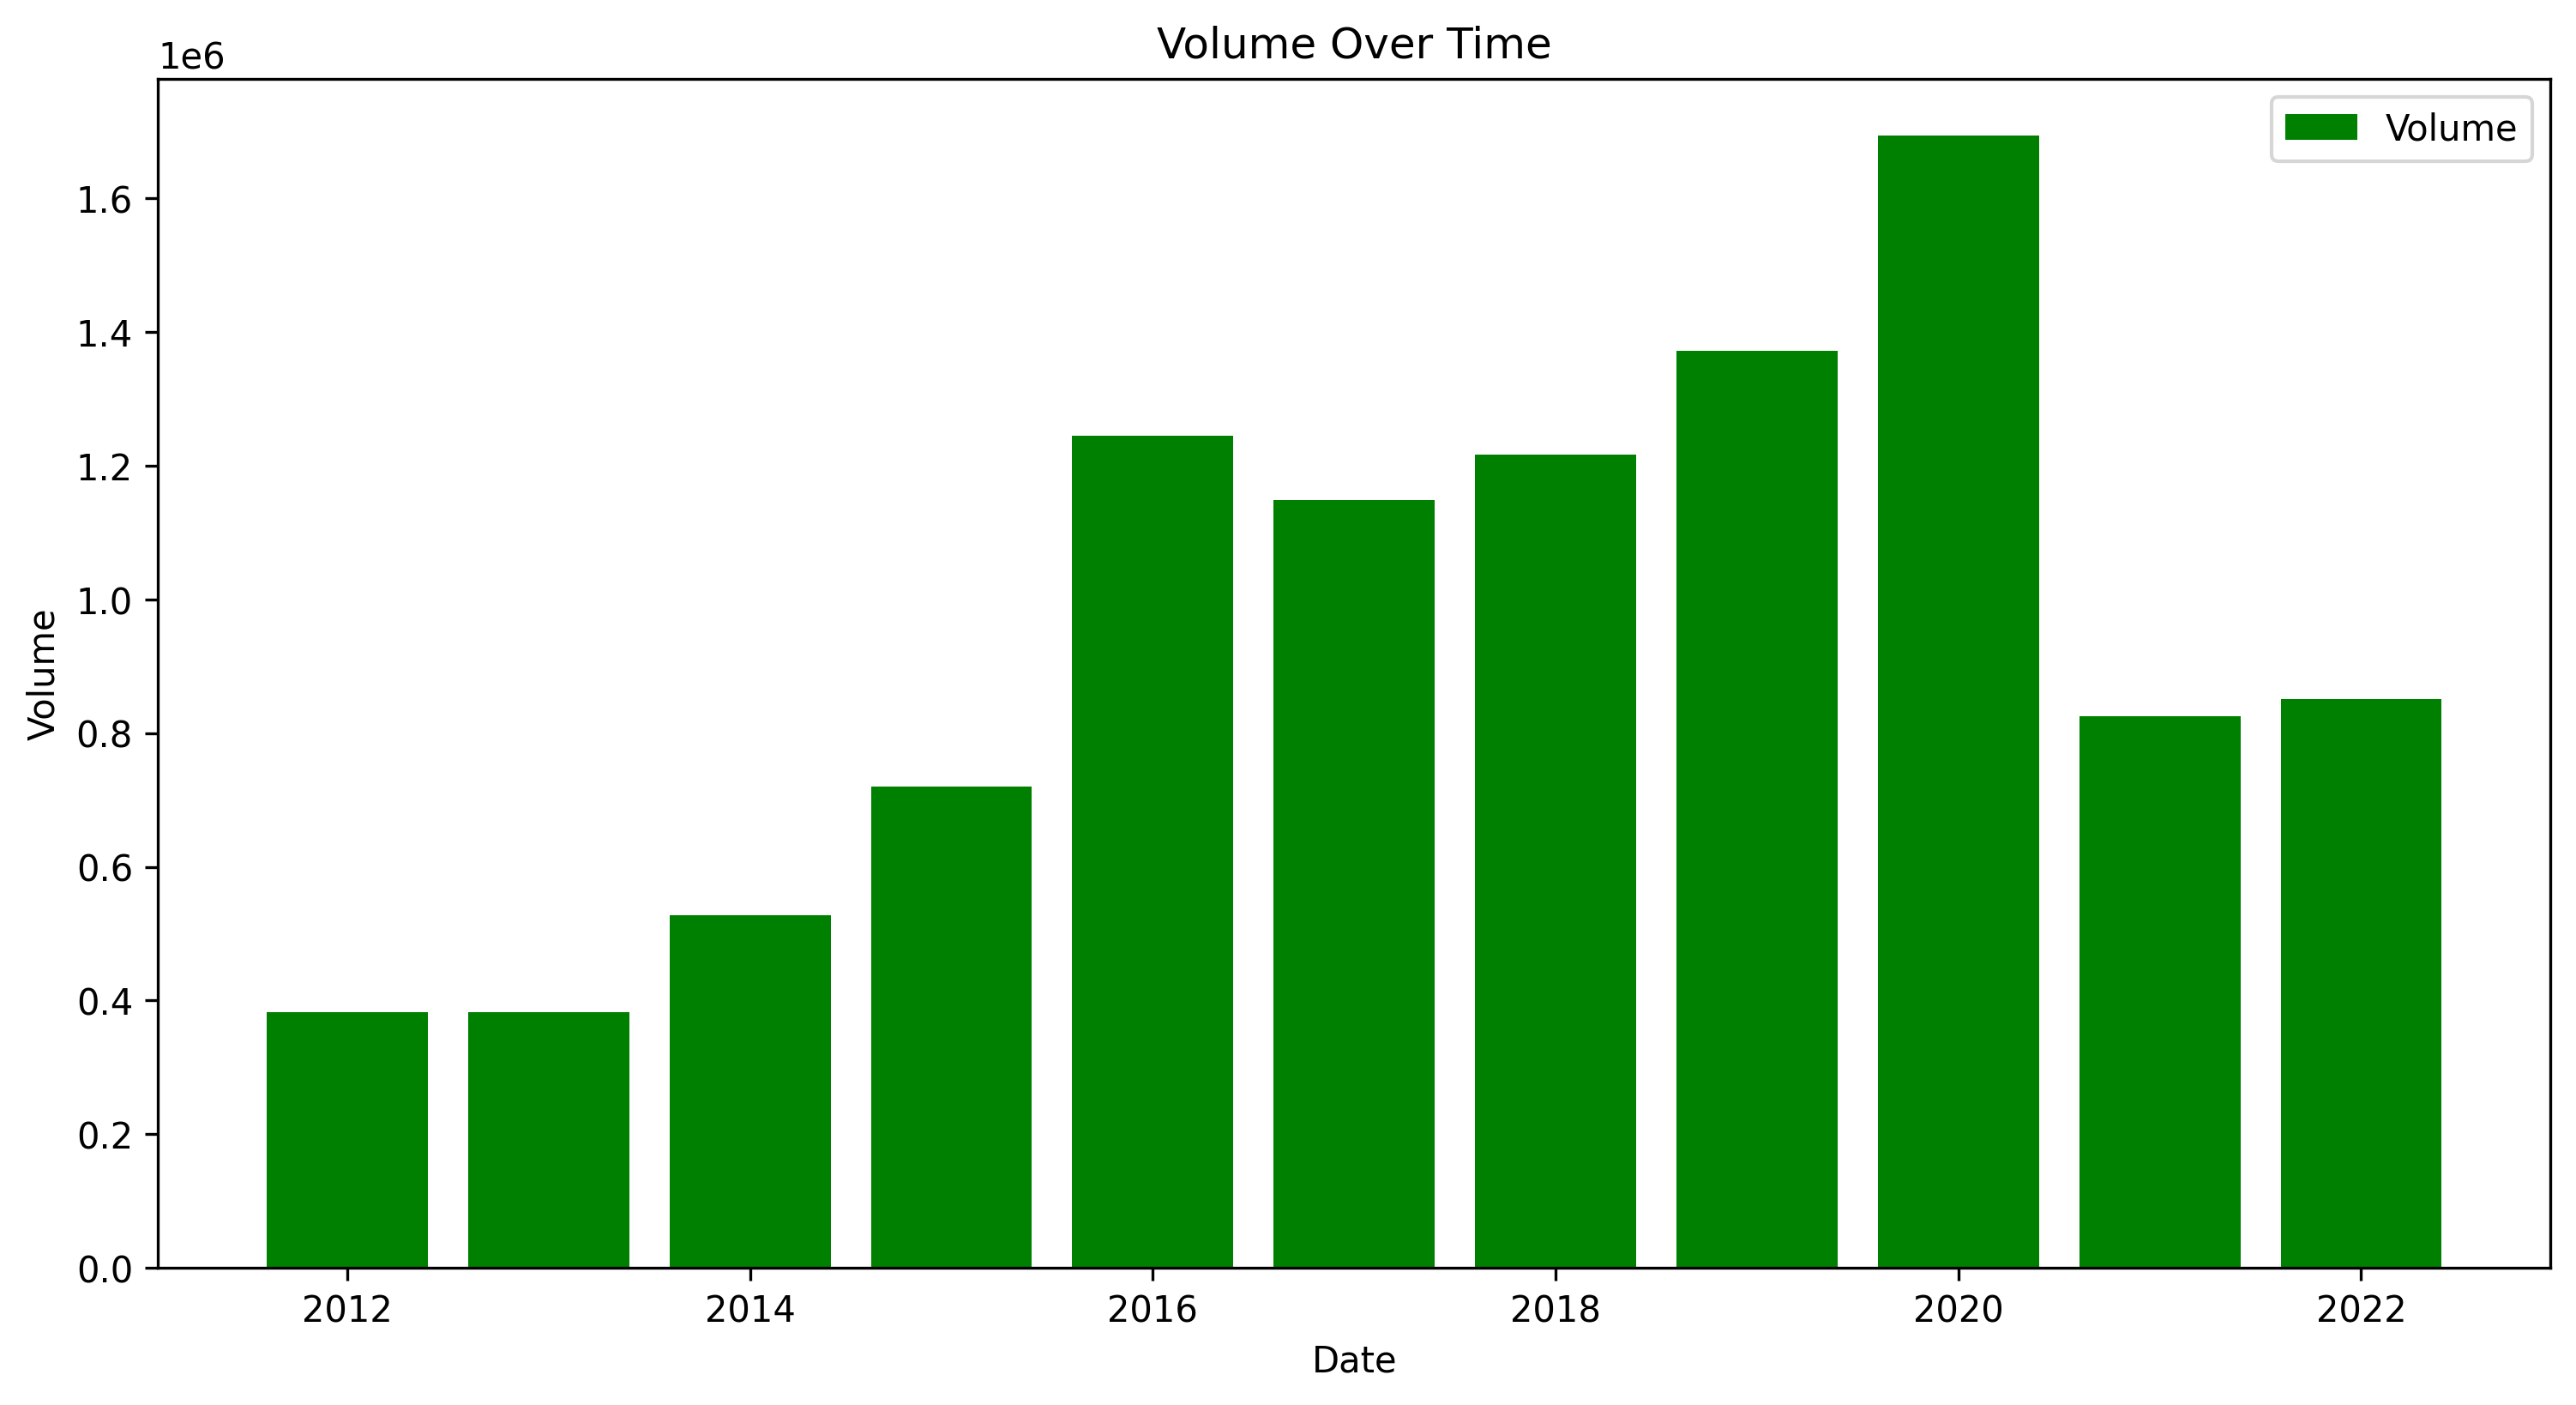

In [31]:
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Volume'], label='Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time')
plt.legend()

### Autocorrelation Plot 

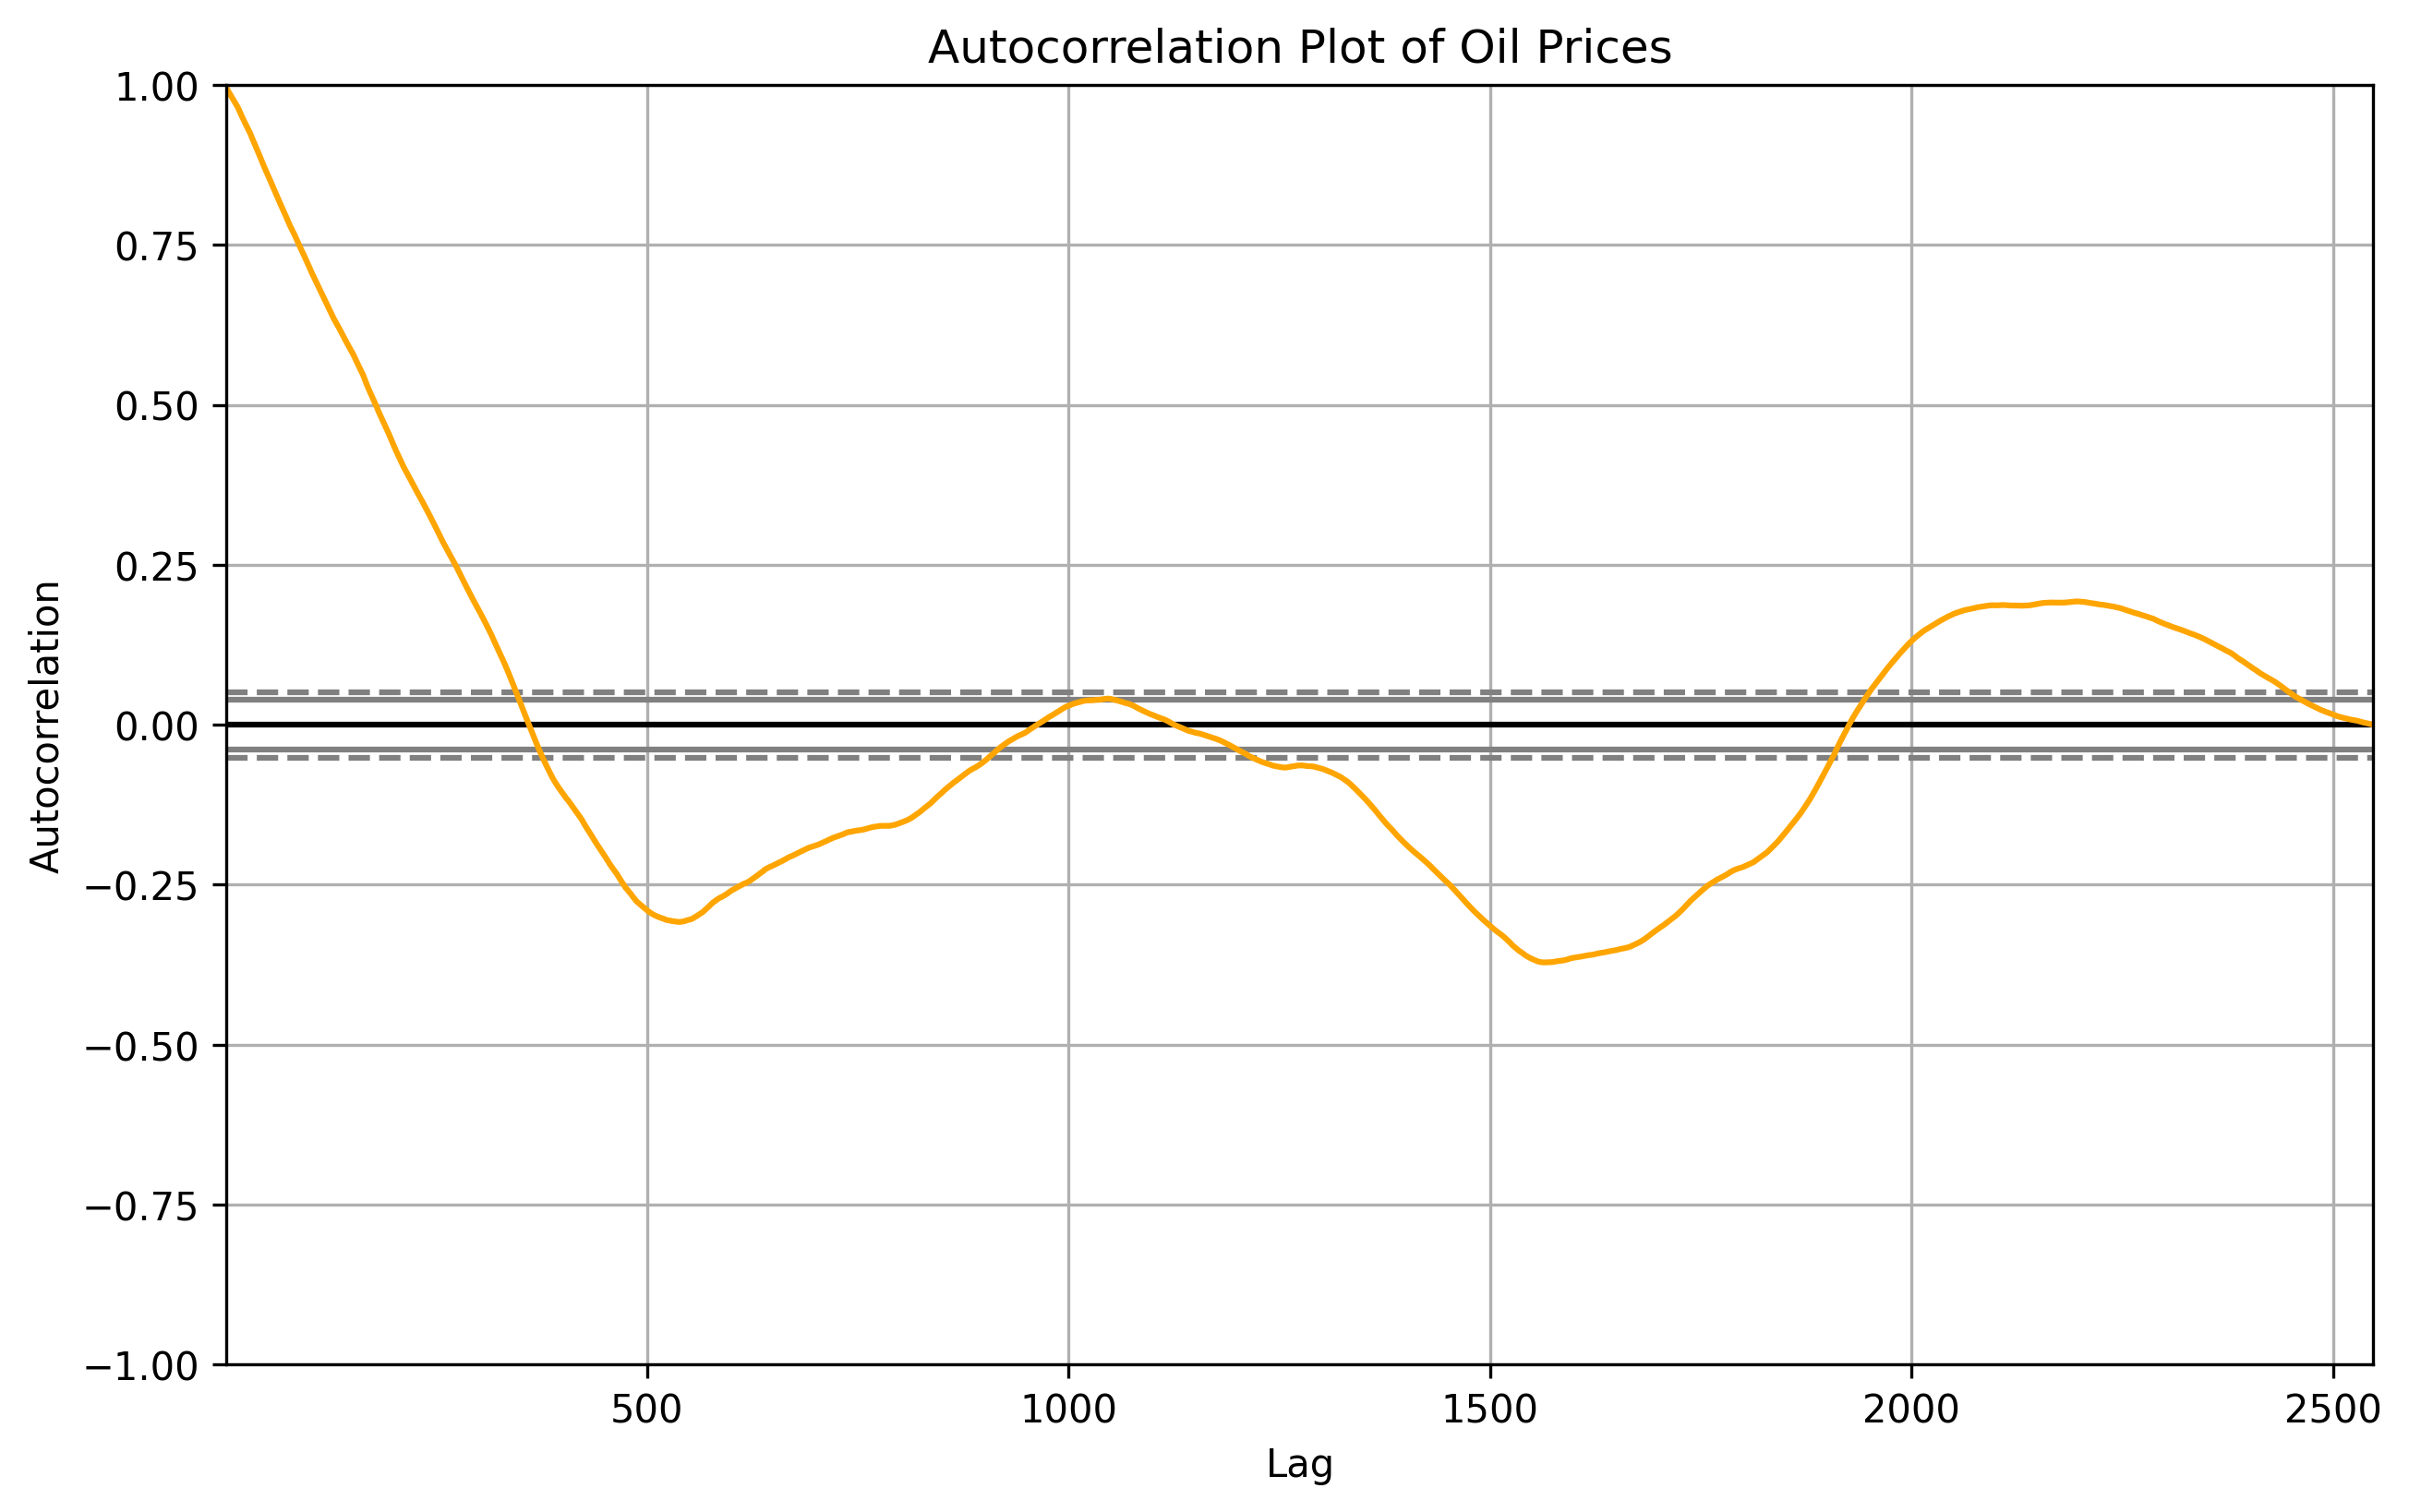

In [32]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Close'].dropna(), color='orange')
plt.title('Autocorrelation Plot of Oil Prices')
plt.show()

### Rolling Mean and Standard Deviation

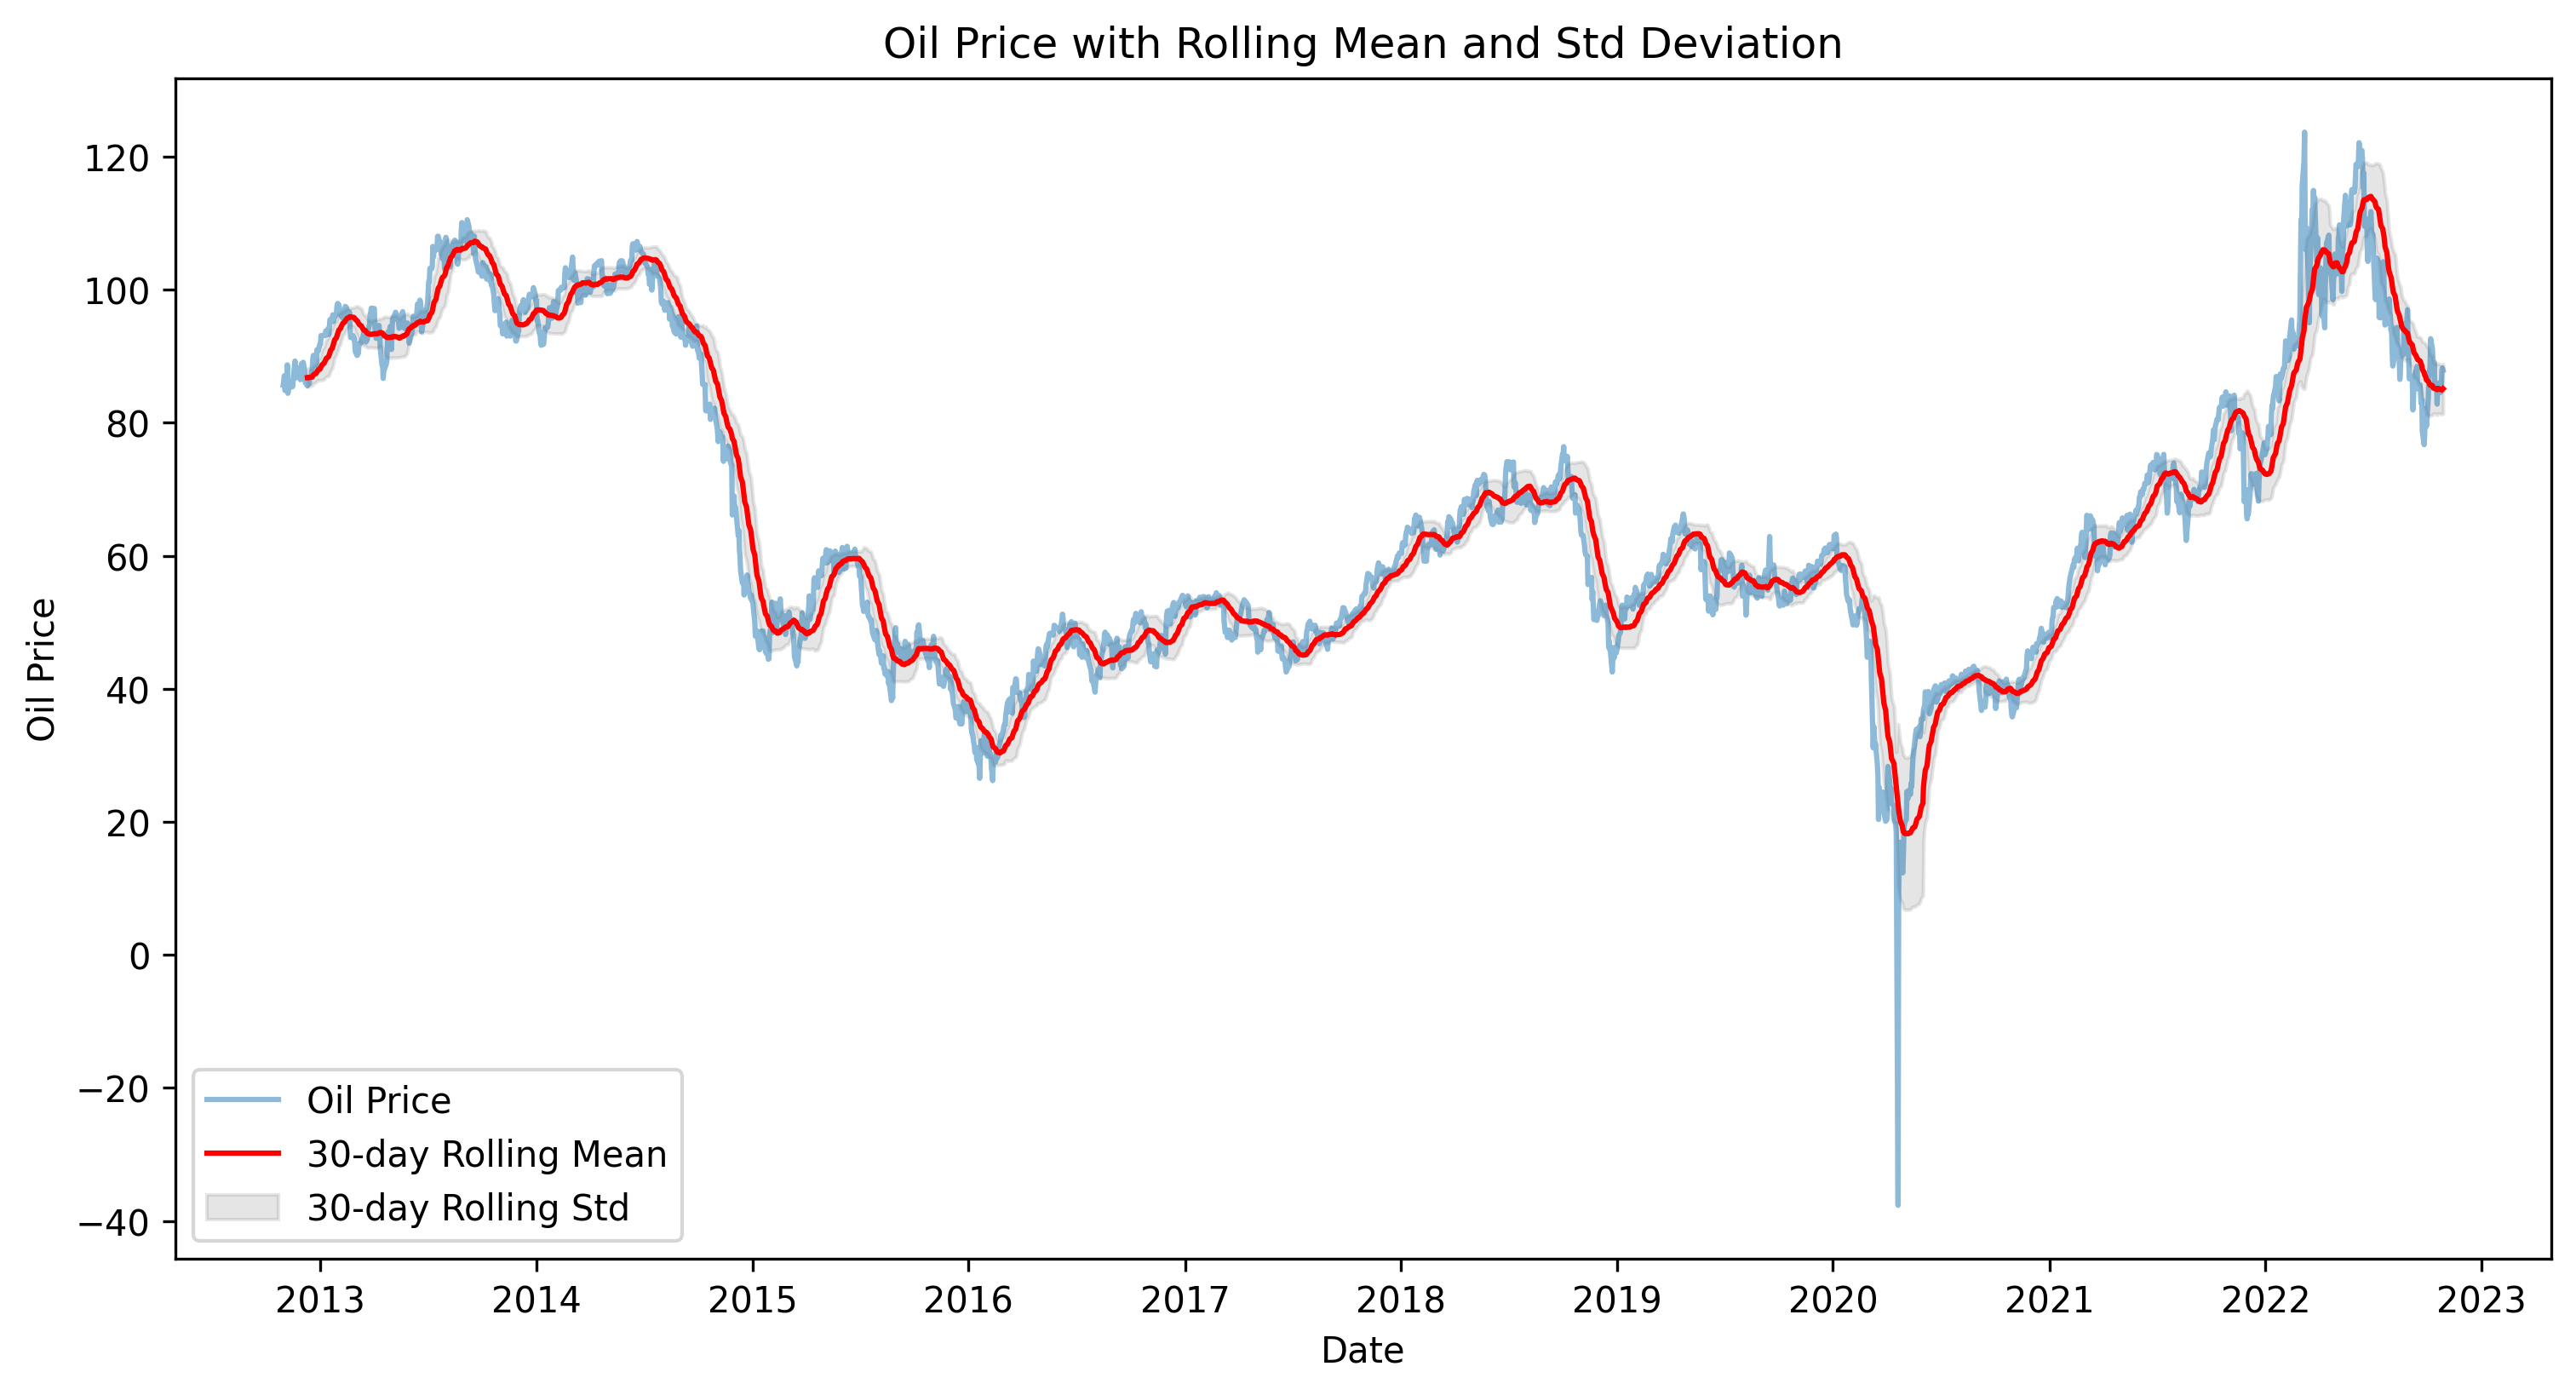

In [33]:
rolling_window = 30
df['Rolling_Mean'] = df['Close'].rolling(window=rolling_window).mean()
df['Rolling_Std'] = df['Close'].rolling(window=rolling_window).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Oil Price', alpha=0.5)
plt.plot(df['Date'], df['Rolling_Mean'], label=f'{rolling_window}-day Rolling Mean', color='red')
plt.fill_between(df['Date'], df['Rolling_Mean'] - df['Rolling_Std'], df['Rolling_Mean'] + df['Rolling_Std'], color='gray', alpha=0.2, label=f'{rolling_window}-day Rolling Std')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price with Rolling Mean and Std Deviation')
plt.legend()

### Heatmap of Correlation Matrix 

Text(0.5, 1.0, 'Correlation Matrix')

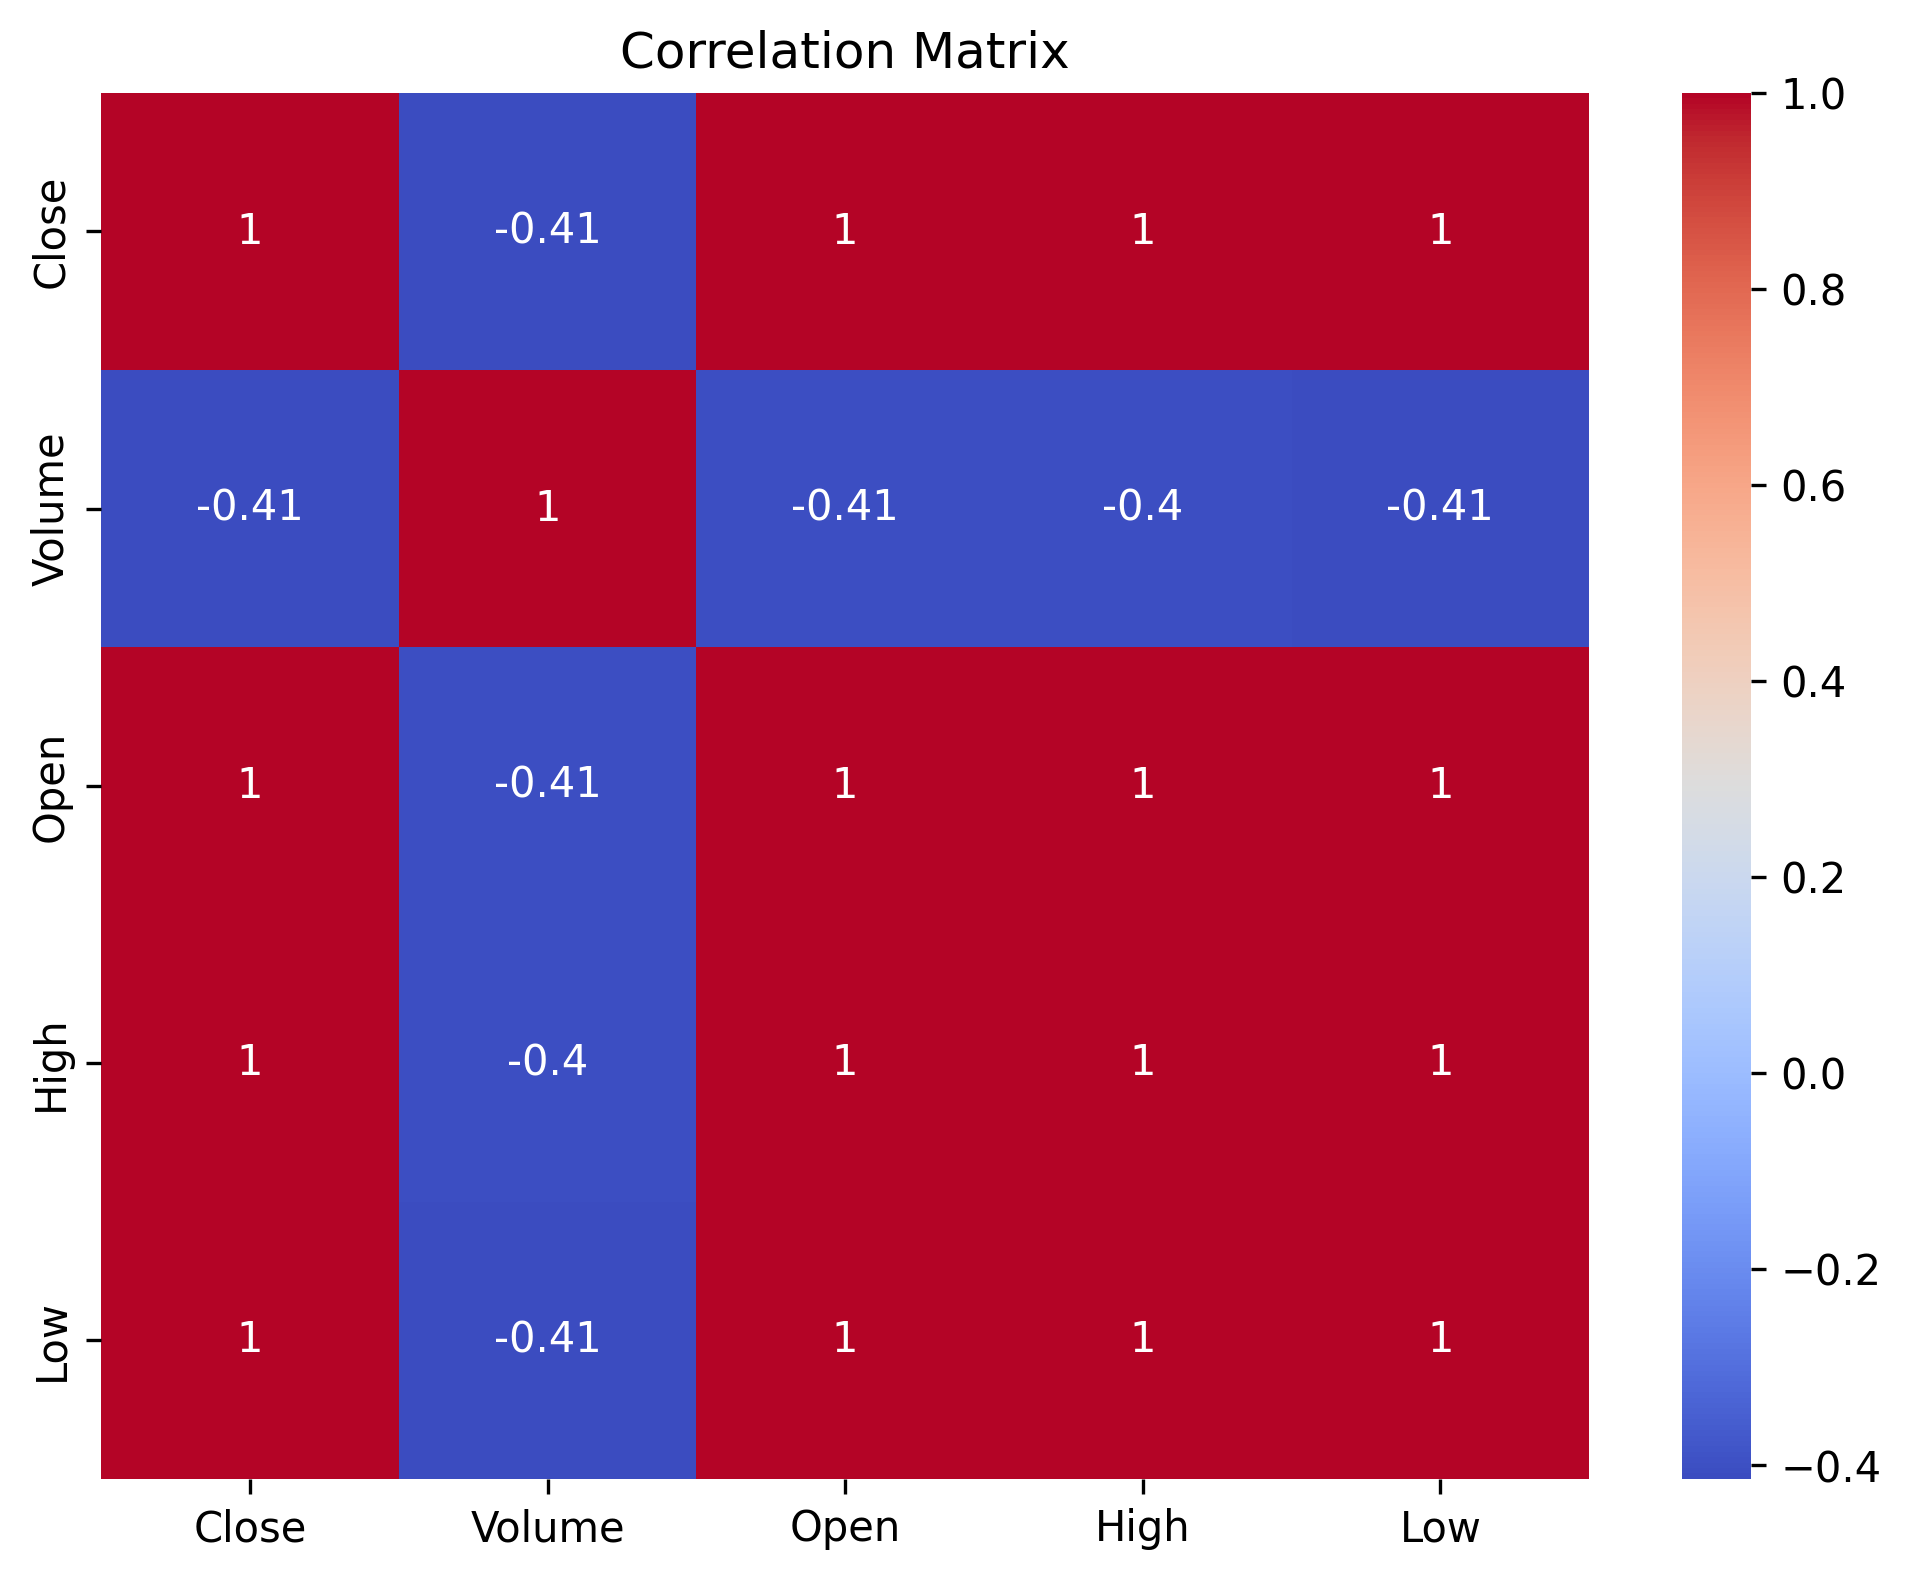

In [34]:
correlation_matrix = oil.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')